# Project 1: SAT & ACT Analysis




## Problem Statement

This project seeks to identify likely factors influencing participation rates and scores and propose recommendations to increase the participation rates for SAT.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2017_df = pd.read_csv('../data/act_2017.csv')




#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
#sat_2017_df.head(10)

act_2017_df.head(10)


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Connecticut, District of Columbia and Delaware has the highest participation rate of 100% for SAT amongst the 10 records. Arkansas has the lowest participation rate but the highest total score.
 

Colorado and Alabama has the highest partipation rate of 100% for ACT amongst the 10 records. Delaware has the lowest participation rate of 18%. Delaware is also 1 of the top-performing states amongst the 10 records. There is an additional national record in the dataset.




#### 4a. Does the data look complete? 

Answer: Yes, the data is complete. All the columns in both datasets non null values.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer: There are issues in the data. 

For the SAT dataset, the Math results for Maryland is below the minimum possible value. In addition, the participation column has the '%' character which may impede further exploration of the data in later stages. This hold true for the ACT dataset as well.

For the ACT dataset, the composite score for Wyoming has an additional character.

The min possible value for ACT is 1 and max possible value is 36
The min possible value for SAT is 200 and max possible value is 800

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [4]:
#code
def fix_error(row,column,new_value,data_frame,data_type):
    data_frame.loc[[row], [column]] = data_type(new_value)
    return data_frame
    

act_2017_df_modified = fix_error(51,'Composite',20.2,act_2017_df,float)
act_2017_df_modified.info()

#Error fix for SAT 
sat_2017_df_modified = fix_error(20,'Math',524,sat_2017_df,int)
sat_2017_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                   

#### 5. What are your data types? 
Display the data types of each feature. 

In [5]:
#code
act_2017_df_modified.info()
sat_2017_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     object 
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                   

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The composite score from the 2017 dataset for ACT is an object and not float as expected
The participation from the datasets are objects and not a numeric type as expected

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [6]:
#code
def modify_data_type(name_of_column,change_to_type, trim=False):
    if trim:
        return lambda x: x.astype(str).str[:-1].astype(change_to_type) if x.name == name_of_column else x
    else:
        return lambda x: x.astype(str).astype(change_to_type) if x.name == name_of_column else x
 


- Fix any individual values preventing other columns from being the appropriate type.

In [7]:
#code


- Finish your data modifications by making sure the columns are now typed appropriately.

In [8]:
#code remove code for 2018
act_2017_df_new = act_2017_df_modified.apply(modify_data_type('Participation',int,1))

act_2017_df_new_2 = act_2017_df_new.apply(modify_data_type('Composite',float))

sat_2017_df_new = sat_2017_df_modified.apply(modify_data_type('Participation',int,1))


- Display the data types again to confirm they are correct.

In [9]:
#Code:

act_2017_df_new_2.info()
sat_2017_df_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     int64  
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 3.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     int64 
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math         

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [10]:
#code
sat_2017_df_renamed = sat_2017_df_new.rename(columns = {'Participation':'participation_SAT_2017', 'Evidence-Based Reading and Writing':'evidence-based_reading_and_writing_SAT_2017', 
                              'Math':'math_SAT_2017','Total':'total_SAT_2017'}) 
sat_2017_df_renamed.info()

act_2017_df_renamed = act_2017_df_new_2.rename(columns = {'Participation':'participation_ACT_2017', 'English':'english_ACT_2017', 
                              'Math':'math_ACT_2017','Reading':'reading_ACT_2017','Science':'science_ACT_2017','Composite':'composite_ACT_2017'}) 
act_2017_df_renamed.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   State                                        51 non-null     object
 1   participation_SAT_2017                       51 non-null     int64 
 2   evidence-based_reading_and_writing_SAT_2017  51 non-null     int64 
 3   math_SAT_2017                                51 non-null     int64 
 4   total_SAT_2017                               51 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   52 non-null     object 
 1   participation_ACT_2017  52 non-null     int64  
 2   english_ACT_2017  

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|ACT/SAT|This is an example| 


|Feature|Type|Dataset|Description|
|:---|:---:|:---:|:---|
|State|object|sat_2017_df_renamed|The states of the United States of America| 
|participation_SAT_2017|int|sat_2017_df_renamed|The participation rates for SAT in 2017| 
|evidence-based_reading_and_writing_SAT_2017|int|sat_2017_df_renamed|The mean results from the evidence-based reading and writing component of SAT in 2017| 
|math_SAT_2017|int|sat_2017_df_renamed|The mean results from the math component of SAT in 2017| 
|total_SAT_2017|int|sat_2017_df_renamed|The total results from the math and the evidence-based reading and writing component of SAT in 2017|
|participation_ACT_2017|int|act_2017_df_renamed|The participation rates for ACT in 2017| 
|reading_ACT_2017|float|act_2017_df_renamed|The mean results from the reading subtest of ACT in 2017| 
|math_ACT_2017|float|act_2017_df_renamed|The mean results from the math subtest of ACT in 2017|
|science_ACT_2017|float|act_2017_df_renamed|The mean results from the science subtest of ACT in 2017| 
|composite_ACT_2017|float|act_2017_df_renamed|The composite score obtained in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [11]:
#code
act_2017_df_renamed.drop([0])

,State,participation_ACT_2017,english_ACT_2017,math_ACT_2017,reading_ACT_2017,science_ACT_2017,composite_ACT_2017
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8
6,Colorado,100,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31,25.5,24.6,25.6,24.6,25.2
8,Delaware,18,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32,24.4,23.5,24.9,23.5,24.2
10,Florida,73,19.0,19.4,21.0,19.4,19.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [12]:
#Code:
sat_act_2017_merge = pd.merge(sat_2017_df_renamed, act_2017_df_renamed,
how='inner', on='State')
sat_act_2017_merge.head(10)
sat_act_2017_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State                                        51 non-null     object 
 1   participation_SAT_2017                       51 non-null     int64  
 2   evidence-based_reading_and_writing_SAT_2017  51 non-null     int64  
 3   math_SAT_2017                                51 non-null     int64  
 4   total_SAT_2017                               51 non-null     int64  
 5   participation_ACT_2017                       51 non-null     int64  
 6   english_ACT_2017                             51 non-null     float64
 7   math_ACT_2017                                51 non-null     float64
 8   reading_ACT_2017                             51 non-null     float64
 9   science_ACT_2017                             51 non-null     float64
 10  comp

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [13]:
#code
sat_act_2017_merge.to_csv('../data/combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [14]:
#Reading the 2018 ACT and SAT datasets
sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018_updated.csv')

#Display the data; check if the data is complete
sat_2018_df.head(10)
sat_2018_df.info()
sat_2018_df.shape

act_2018_df.head(10)
act_2018_df.info()
act_2018_df.shape

#Changing data type for SAT 2018
sat_2018_df_new = sat_2018_df.apply(modify_data_type('Participation',int,1))

#Renaming the columns
sat_2018_df_renamed = sat_2018_df_new.rename(columns = {'Participation':'participation_SAT_2018', 'Evidence-Based Reading and Writing':'evidence-based_reading_and_writing_SAT_2018', 
                              'Math':'math_SAT_2018','Total':'total_SAT_2018'}) 
sat_2018_df_renamed.info()

act_2018_df_renamed = act_2018_df.rename(columns = {'Percentage of Students Tested':'participation_ACT_2018', 'Average English Score':'english_ACT_2018', 
                              'Average Math Score':'math_ACT_2018','Average Reading Score':'reading_ACT_2018','Average Science Score':'science_ACT_2018','Average Composite Score':'composite_ACT_2018'}) 
act_2018_df_renamed.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float6

In [15]:
#merging the dataframes
sat_act_2018_merge = pd.merge(sat_2018_df_renamed, act_2018_df_renamed,
how='inner', on='State')
sat_act_2018_merge.head(10)
sat_act_2018_merge.info()

#saving as csv
sat_act_2018_merge.to_csv('../data/combined_2018.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 11 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State                                        51 non-null     object 
 1   participation_SAT_2018                       51 non-null     int64  
 2   evidence-based_reading_and_writing_SAT_2018  51 non-null     int64  
 3   math_SAT_2018                                51 non-null     int64  
 4   total_SAT_2018                               51 non-null     int64  
 5   participation_ACT_2018                       51 non-null     int64  
 6   composite_ACT_2018                           51 non-null     float64
 7   english_ACT_2018                             51 non-null     float64
 8   math_ACT_2018                                51 non-null     float64
 9   reading_ACT_2018                             51 non-null     float64
 10  scie

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [16]:
sat_act_2017_2018_merge = pd.merge(sat_act_2017_merge, sat_act_2018_merge,
how='inner', on='State')
sat_act_2017_2018_merge.head(10)
sat_act_2017_2018_merge.to_csv('../data/final.csv')
sat_act_2017_2018_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   State                                        51 non-null     object 
 1   participation_SAT_2017                       51 non-null     int64  
 2   evidence-based_reading_and_writing_SAT_2017  51 non-null     int64  
 3   math_SAT_2017                                51 non-null     int64  
 4   total_SAT_2017                               51 non-null     int64  
 5   participation_ACT_2017                       51 non-null     int64  
 6   english_ACT_2017                             51 non-null     float64
 7   math_ACT_2017                                51 non-null     float64
 8   reading_ACT_2017                             51 non-null     float64
 9   science_ACT_2017                             51 non-null     float64
 10  comp

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [17]:
#Code:
sat_act_2017_2018_merge.describe()

,participation_SAT_2017,evidence-based_reading_and_writing_SAT_2017,math_SAT_2017,total_SAT_2017,participation_ACT_2017,english_ACT_2017,math_ACT_2017,reading_ACT_2017,science_ACT_2017,composite_ACT_2017,participation_SAT_2018,evidence-based_reading_and_writing_SAT_2018,math_SAT_2018,total_SAT_2018,participation_ACT_2018,composite_ACT_2018,english_ACT_2018,math_ACT_2018,reading_ACT_2018,science_ACT_2018
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [18]:
#code
def calculate_std(column_name,sample_size, sample_mean,data_frame):
    sum_of_values_in_data = 0
    for i in range(len(data_frame)):
        sum_of_values_in_data = sum_of_values_in_data + (data_frame.loc[i, column_name]  - sample_mean)**2
    std = ((1/sample_size)*sum_of_values_in_data)**0.5 
    return std

std = calculate_std('evidence-based_reading_and_writing_SAT_2017',51,569.117,sat_act_2017_2018_merge)
std

45.2169702090084

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [19]:
#Code:
#{k:v.lower() for k,v in users.items()}
def get_column_dict_using_np(data):
    '''create a dictionary using numpy for testing purpose'''
    std_dict = {}
    for col in data.select_dtypes(include=['int64','float64']).columns: 
        std_dict[col]=np.std(data[col])
    return std_dict

def get_column_dict(data):
    '''create a dictionary using dictionary comprehension without using loops'''
    std_dict = {}
    std_dict_new = {}
    
    std_dict = data.select_dtypes(include=['int64','float64']).to_dict()
    std_dict_new = {k:calculate_std(k,len(data),data[k].mean(),data) for k, v in std_dict.items()}
        
    return std_dict_new    

sat_act_std_dict = get_column_dict(sat_act_2017_2018_merge)
sat_act_std_dict

{'participation_SAT_2017': 34.92907076664508,
 'evidence-based_reading_and_writing_SAT_2017': 45.21697020437866,
 'math_SAT_2017': 46.65713364485503,
 'total_SAT_2017': 91.58351056778743,
 'participation_ACT_2017': 31.824175751231806,
 'english_ACT_2017': 2.3304876369363363,
 'math_ACT_2017': 1.9624620273436781,
 'reading_ACT_2017': 2.0469029314842646,
 'science_ACT_2017': 3.1511078954644076,
 'composite_ACT_2017': 2.000786081581989,
 'participation_SAT_2018': 36.946619223539415,
 'evidence-based_reading_and_writing_SAT_2018': 47.03460978357609,
 'math_SAT_2018': 47.30194550378352,
 'total_SAT_2018': 93.22742384464433,
 'participation_ACT_2018': 33.745194881997506,
 'composite_ACT_2018': 2.0855261815801147,
 'english_ACT_2018': 2.4222536143202795,
 'math_ACT_2018': 2.015707255555717,
 'reading_ACT_2018': 2.145891884510421,
 'science_ACT_2018': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

They did not match perfectly. Similar results using numpy's std method

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [20]:
#code
final_df_with_sort_SAT_2017 = sat_act_2017_2018_merge[['State','participation_SAT_2017']].sort_values(by=['participation_SAT_2017'], ascending=False)
#highest participation rate for SAT 2017
final_df_with_sort_SAT_2017.head()
#lowest participation rate for SAT 2017
final_df_with_sort_SAT_2017.tail()

final_df_with_sort_SAT_2018 = sat_act_2017_2018_merge[['State','participation_SAT_2018']].sort_values(by=['participation_SAT_2018'], ascending=False)
#highest participation rate for SAT 2018
final_df_with_sort_SAT_2018.head()
#lowest participation rate for SAT 2018
final_df_with_sort_SAT_2018.tail()

final_df_with_sort_ACT_2017 = sat_act_2017_2018_merge[['State','participation_ACT_2017']].sort_values(by=['participation_ACT_2017'], ascending=False)
#highest participation rate for ACT 2017
final_df_with_sort_ACT_2017.head()
#lowest participation rate for ACT 2017
final_df_with_sort_ACT_2017.tail()

final_df_with_sort_ACT_2018 = sat_act_2017_2018_merge[['State','participation_ACT_2018']].sort_values(by=['participation_ACT_2018'], ascending=False)
#highest participation rate for ACT 2018
final_df_with_sort_ACT_2018.head()
#lowest participation rate for ACT 2018
final_df_with_sort_ACT_2018.tail()

final_df_with_sort_total_SAT_2017 = sat_act_2017_2018_merge[['State','total_SAT_2017']].sort_values(by=['total_SAT_2017'], ascending=False)
#highest total score for SAT 2017
final_df_with_sort_total_SAT_2017.head()
#lowest total score for SAT 2017
final_df_with_sort_total_SAT_2017.tail()

final_df_with_sort_total_SAT_2018 = sat_act_2017_2018_merge[['State','total_SAT_2018']].sort_values(by=['total_SAT_2018'], ascending=False)
#highest total score for SAT 2018
final_df_with_sort_total_SAT_2018.head()
#lowest total score for SAT 2018
final_df_with_sort_total_SAT_2018.tail()

final_df_with_sort_composite_ACT_2017 = sat_act_2017_2018_merge[['State','composite_ACT_2017']].sort_values(by=['composite_ACT_2017'], ascending=False)
#highest composite score for ACT 2017
final_df_with_sort_composite_ACT_2017.head()
#lowest composite score for ACT 2017
final_df_with_sort_composite_ACT_2017.tail()

final_df_with_sort_composite_ACT_2018 = sat_act_2017_2018_merge[['State','composite_ACT_2018']].sort_values(by=['composite_ACT_2018'], ascending=False)
#highest composite score for ACT 2018
final_df_with_sort_composite_ACT_2018.head()
#lowest composite score for ACT 2018
final_df_with_sort_composite_ACT_2018.tail()

#Obtain states with at least 50% participation for both ACT and SAT in 2017
final_df_2017_with_50_percent = sat_act_2017_2018_merge[['State','participation_SAT_2017','participation_ACT_2017']].loc[(sat_act_2017_2018_merge['participation_SAT_2017'] > 50) & (sat_act_2017_2018_merge['participation_ACT_2017'] > 50)]
final_df_2017_with_50_percent

#Obtain states with at least 50% participation for both ACT and SAT in 2018
final_df_2018_with_50_percent = sat_act_2017_2018_merge[['State','participation_SAT_2018','participation_ACT_2018']].loc[(sat_act_2017_2018_merge['participation_SAT_2018'] > 50) & (sat_act_2017_2018_merge['participation_ACT_2018'] > 50)]
final_df_2018_with_50_percent





,State,participation_SAT_2018,participation_ACT_2018
9,Florida,56,66
10,Georgia,70,53
11,Hawaii,56,89
33,North Carolina,52,100
40,South Carolina,55,100


# Investigating trends
The states with highest participation rates for 2017 SAT: District of Columbia, Michigan,Connecticut,Delaware(100%)

The states with lowest participation rates for 2017 SAT: North Dakota, Mississippi,Iowa(2%)

The states with highest participation rates for 2018 SAT: Colorado, Connecticut,Delaware,Michigan,Idaho(100%)

The states with lowest participation rates for 2018 SAT: North Dakota(2%), Mississippi,Iowa,Wisconsin,Wyoming(3%)

The states with highest participation rates for 2017 ACT: Alabama, Kentucky,Wisconsin,Utah,Tennessee,South Carolina,Oklahoma,North Carolina,Nevada,Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Colorado,Arkansas(100%)

The states with lowest participation rates for 2017 ACT: Maine(8%), Delaware,New Hampshire(18%),Rhode Island(21%),Pennsylvania(23%)

The states with highest participation rates for 2018 ACT: Alabama, Kentucky,Wisconsin,Utah,Tennessee,South Carolina,Oklahoma,Ohio,North Carolina,Nevada,Nebraska,Montana,Mississippi,Minnesota,Louisiana,Missouri,Wyoming,Arkansas,North Dakota,Hawaii(100%)

The states with lowest participation rates for 2018 ACT: Maine(7%),Rhode Island(15%) ,New Hampshire(16%),Delaware(17%),Pennsylvania(20%)

------------------------------------------------------------------------------
The states with highest total score for 2017 SAT: Minnesota(1295), Wisconsin(1291),Iowa(1275),Missouri(1271),Kansas(1260)

The states with lowest total score for 2017 SAT: District of Columbia(950), Delaware(996),Michigan(1005),Idaho(1005),Maine(1012)

The states with highest total score for 2018 SAT: Minnesota(1298), Wisconsin(1294),North Dakota(1283),Iowa(1265),Kansas(1265)

The states with lowest total score for 2018 SAT: District of Columbia(977), Delaware(998),West Virginia(999),Idaho(1001),Hawaii(1010)

The states with highest composite score for 2017 ACT: New Hampshire(25.5),Massachusetts(25.4),
Connecticut(25.2),Maine(24.3),District of Columbia(24.2)

The states with lowest composite score for 2017 ACT: Nevada(17.8),Mississippi(18.6),South Carolina(18.7),Hawaii(19.0),North Carolina(19.1)

The states with highest composite score for 2018 ACT: Connecticut(25.6),
Massachusetts(25.5), New Hampshire(25.1), New York(24.5), Michigan(24.4)

The states with lowest composite score for 2018 ACT: Nevada(17.7),South Carolina(18.3),Mississippi(18.6),Hawaii(18.9),Alabama(19.1)

------------------------------------------------------------------------------
The SAT participation rate for District of Columbia was 100% in 2017 and dropped to 92% in 2018

The ACT participation rate for Colorado was 100% in 2017 and dropped to 30% in 2018

------------------------------------------------------------------------------

The states which have >50% participation on both tests in 2017 are: Florida(SAT:83, ACT:73), Georgia(SAT:61, ACT:55), Hawaii(SAT:55, ACT:90)

The states which have >50% participation on both tests in 2018 are: Florida(SAT:56, ACT:66), Georgia(SAT:70, ACT:53), Hawaii(SAT:56, ACT:89), North Carolina(SAT:52, ACT:100), South Carolina(SAT:55, ACT:100)





## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

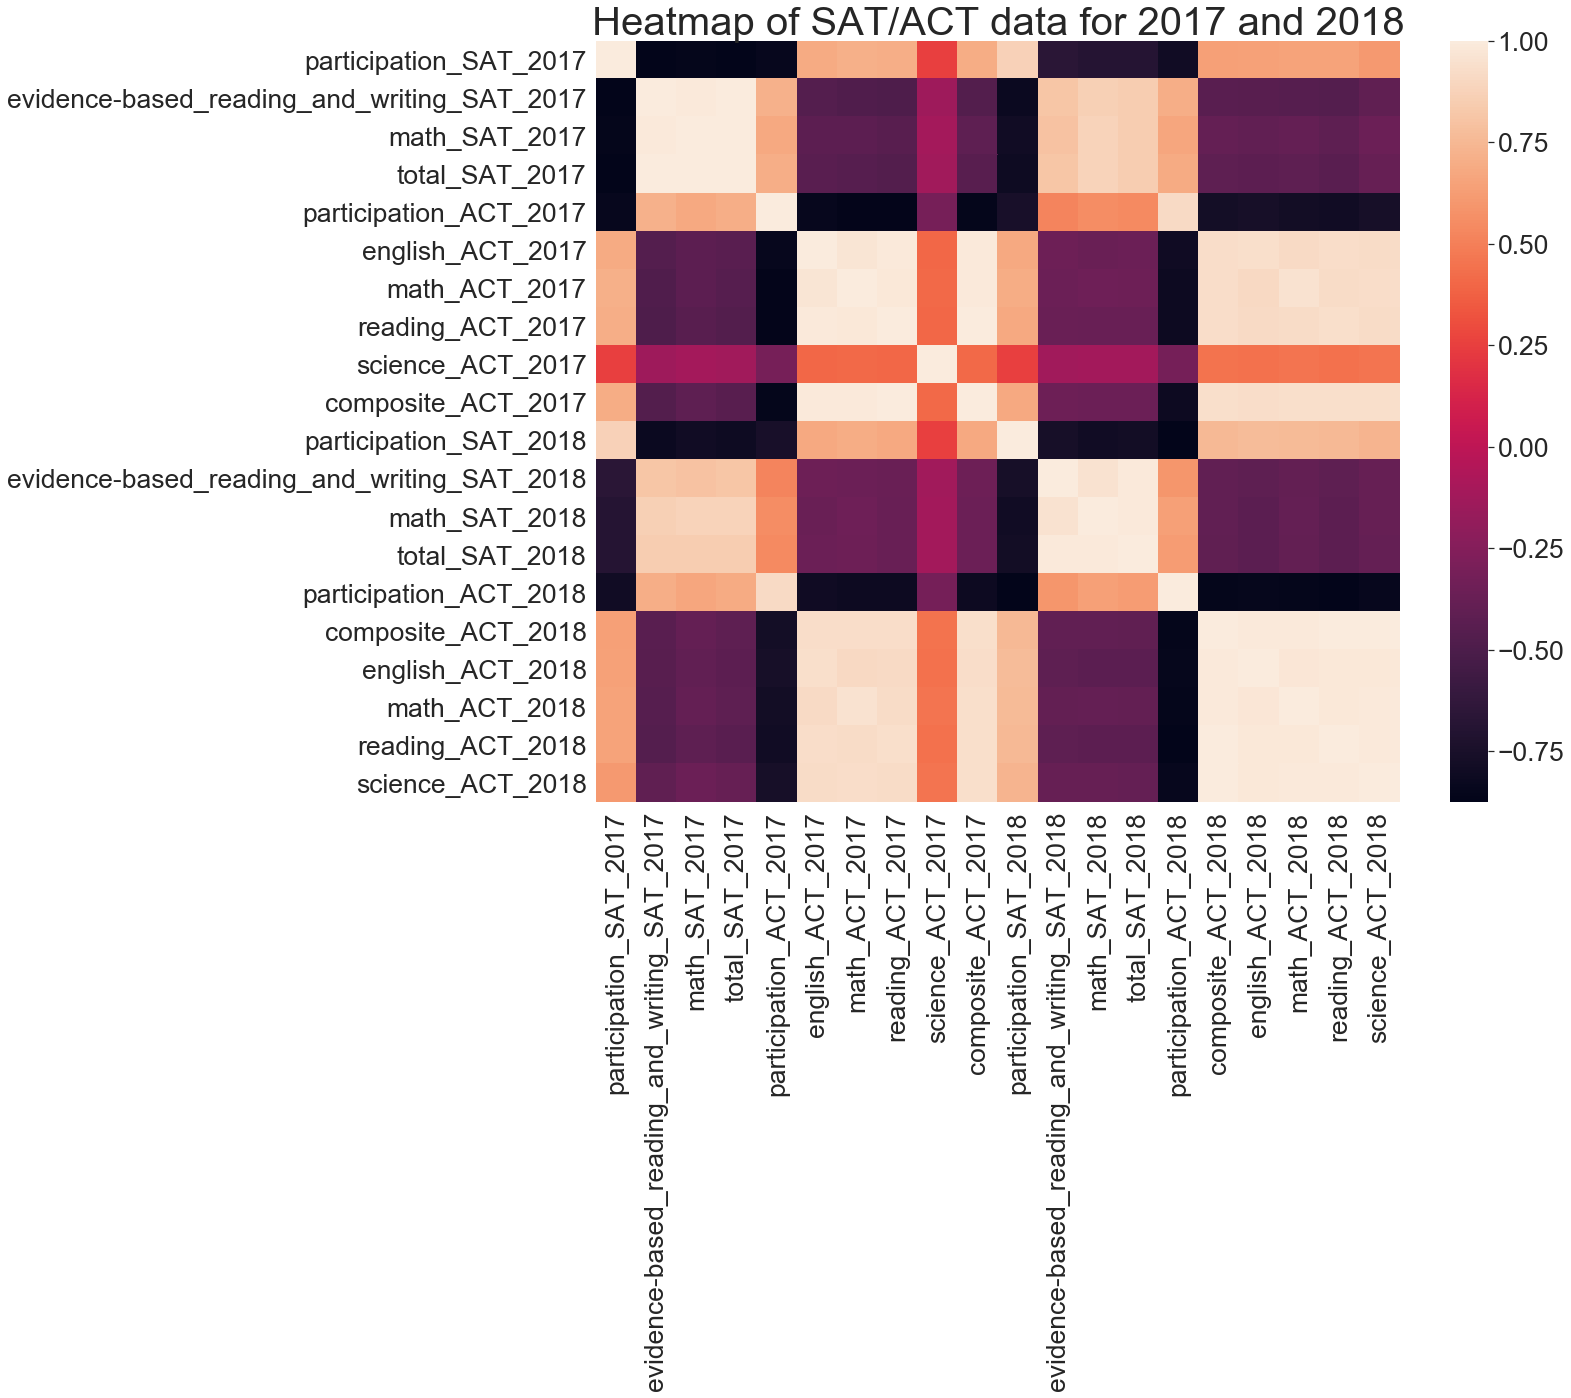

In [21]:

plt.figure(figsize=(18,14))
sns.set(font_scale=2.4)
sns.heatmap(sat_act_2017_2018_merge.corr()
)

plt.title("Heatmap of SAT/ACT data for 2017 and 2018", fontsize =40)
plt.show()

#Trends observed from heatmap:
# Participation rates are -ve correlated to scores of the subtest/tests for both SAT and ACT
# Participation of one test is -ve correlated to the participation in another test

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [22]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(18,14)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    color=['blue','salmon','darkblue','coral']
    alpha = [1,0.3,1,0.3]
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color=color[i]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylabel('Number of States')
    plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

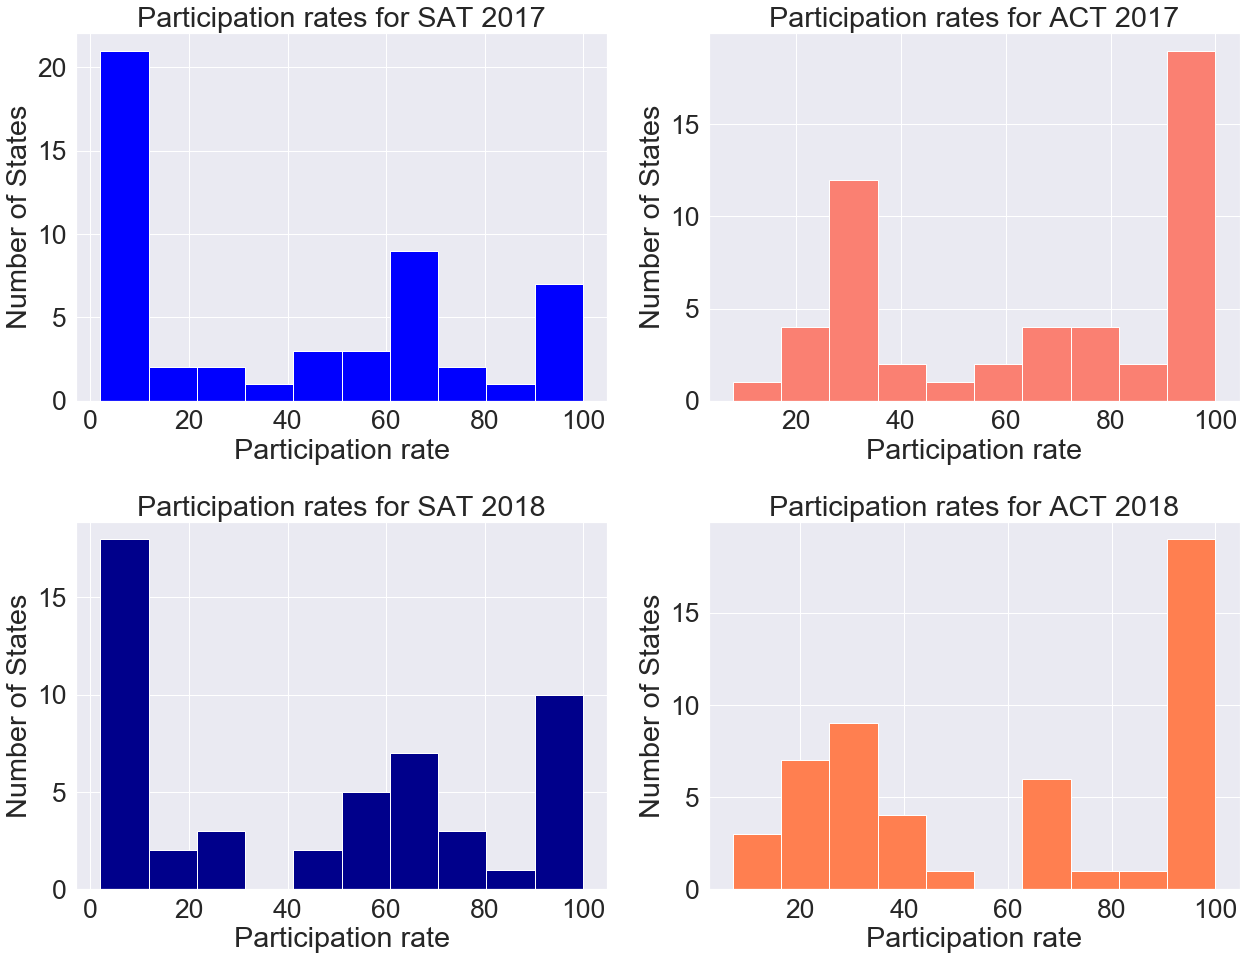

In [23]:
# Participation rates for SAT & ACT
list_of_columns = ['participation_SAT_2017','participation_ACT_2017','participation_SAT_2018','participation_ACT_2018']
xaxes = ['Participation rate','Participation rate','Participation rate','Participation rate']
titles = ['Participation rates for SAT 2017','Participation rates for ACT 2017','Participation rates for SAT 2018','Participation rates for ACT 2018'] 
subplot_histograms(sat_act_2017_2018_merge, list_of_columns, titles, xaxes)



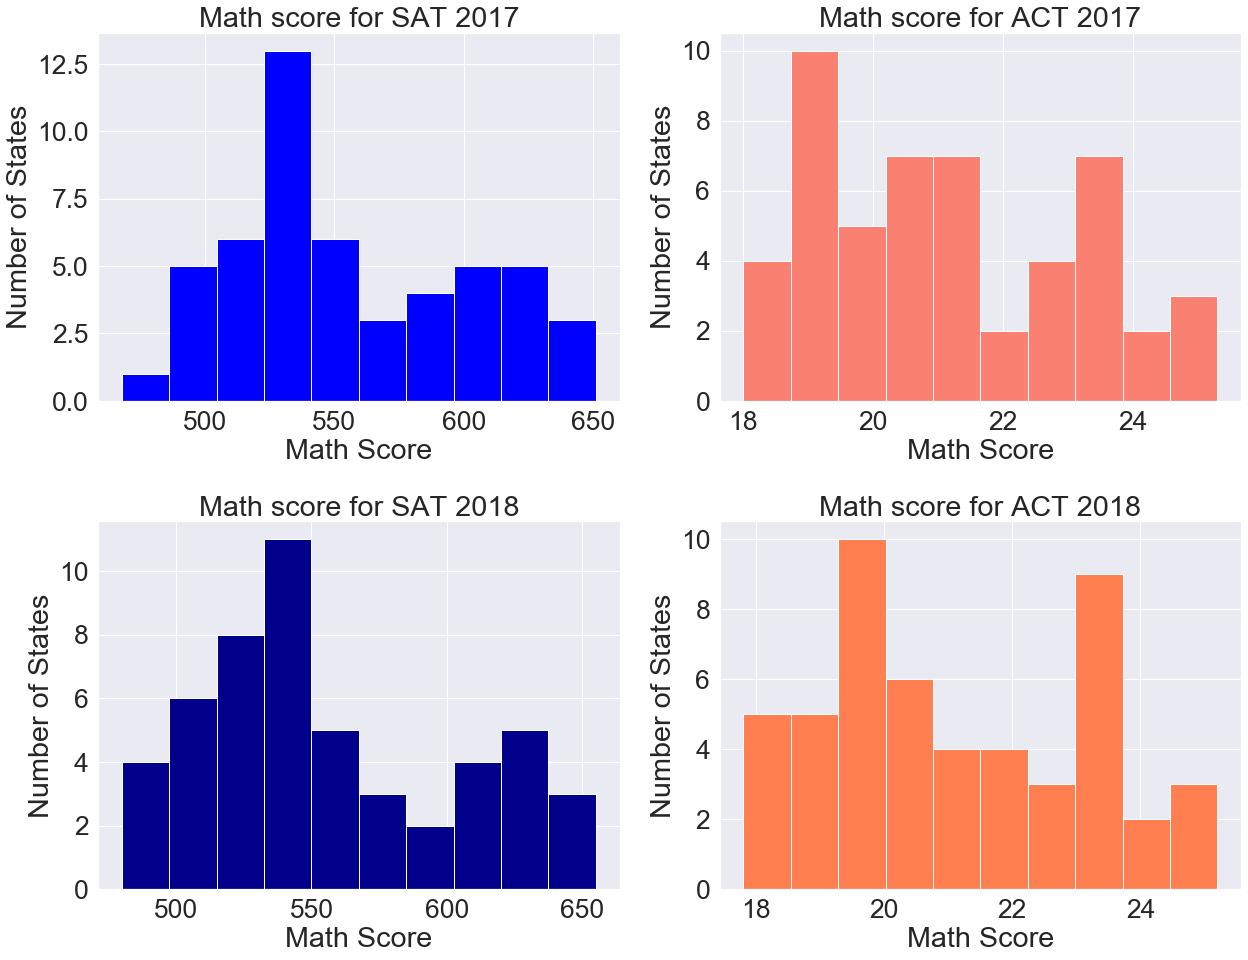

In [24]:

#Math scores for SAT & ACT
list_of_columns_math = ['math_SAT_2017','math_ACT_2017','math_SAT_2018','math_ACT_2018']
xaxes_math = ['Math Score','Math Score','Math Score','Math Score']
titles_math = ['Math score for SAT 2017','Math score for ACT 2017','Math score for SAT 2018','Math score for ACT 2018'] 
subplot_histograms(sat_act_2017_2018_merge, list_of_columns_math, titles_math, xaxes_math)



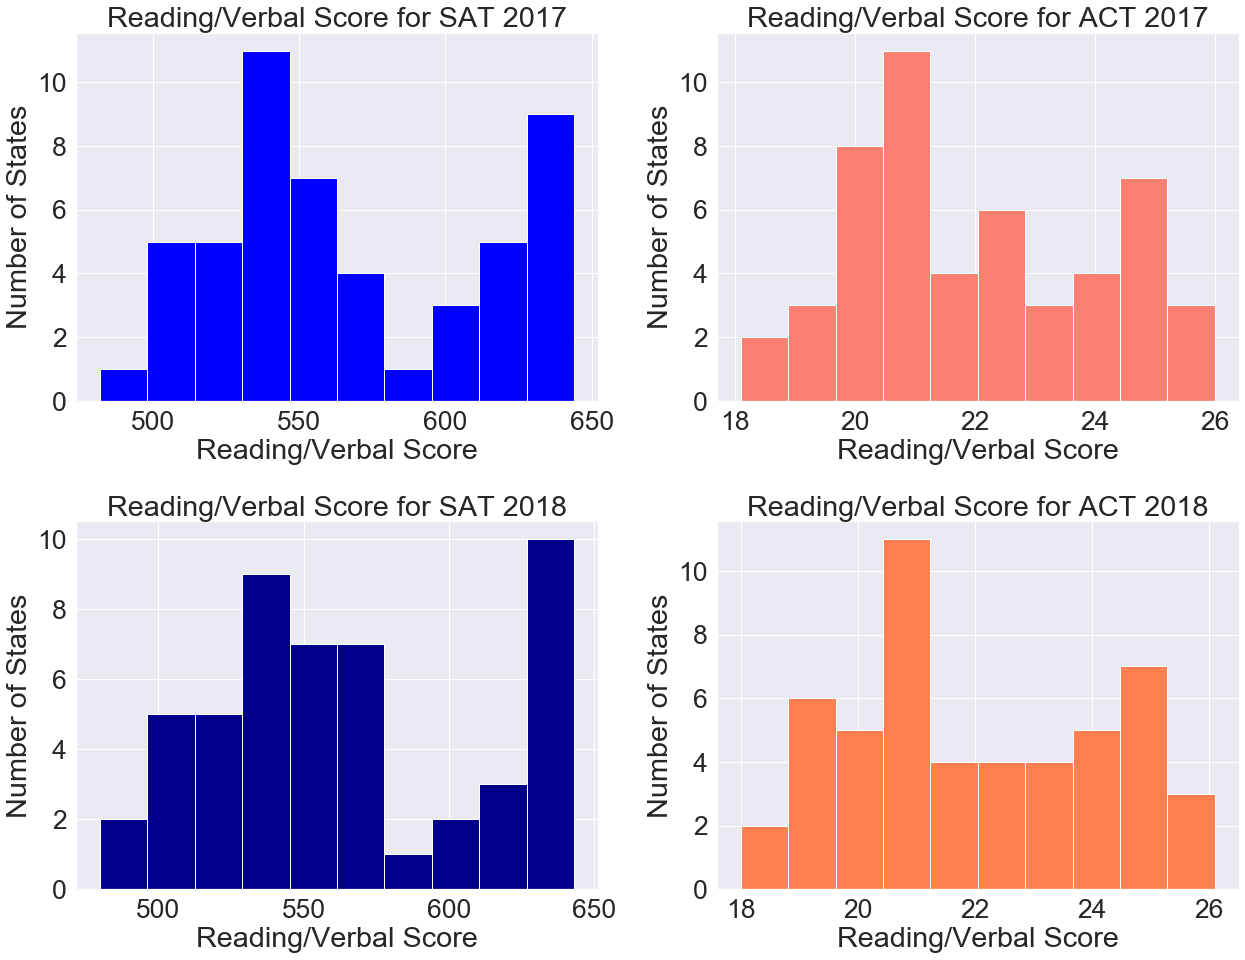

In [25]:
#Reading/verbal scores for SAT & ACT
list_of_columns_reading = ['evidence-based_reading_and_writing_SAT_2017','reading_ACT_2017','evidence-based_reading_and_writing_SAT_2018','reading_ACT_2018']
xaxes_reading = ['Reading/Verbal Score','Reading/Verbal Score','Reading/Verbal Score','Reading/Verbal Score']
titles_reading = ['Reading/Verbal Score for SAT 2017','Reading/Verbal Score for ACT 2017','Reading/Verbal Score for SAT 2018','Reading/Verbal Score for ACT 2018'] 
subplot_histograms(sat_act_2017_2018_merge, list_of_columns_reading, titles_reading, xaxes_reading)



# Findings from subplots:
Participation rates for SAT & ACT: 
Small increase in number of states with 100% participation rates for SAT from 2017 to 2018. Number of states with 100% participation rates for ACT remain consistent from 2017 to 2018.

Math scores for SAT & ACT: 
Majority of states get scores > 500 for SAT in 2017/2018. Number of top scorers remain consistent for ACT. 

Reading/verbal scores for SAT & ACT:
Small increase in top scorers for SAT from 2017 to 2018. Number of top scorers for ACT remain consistent from 2017 to 2018.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


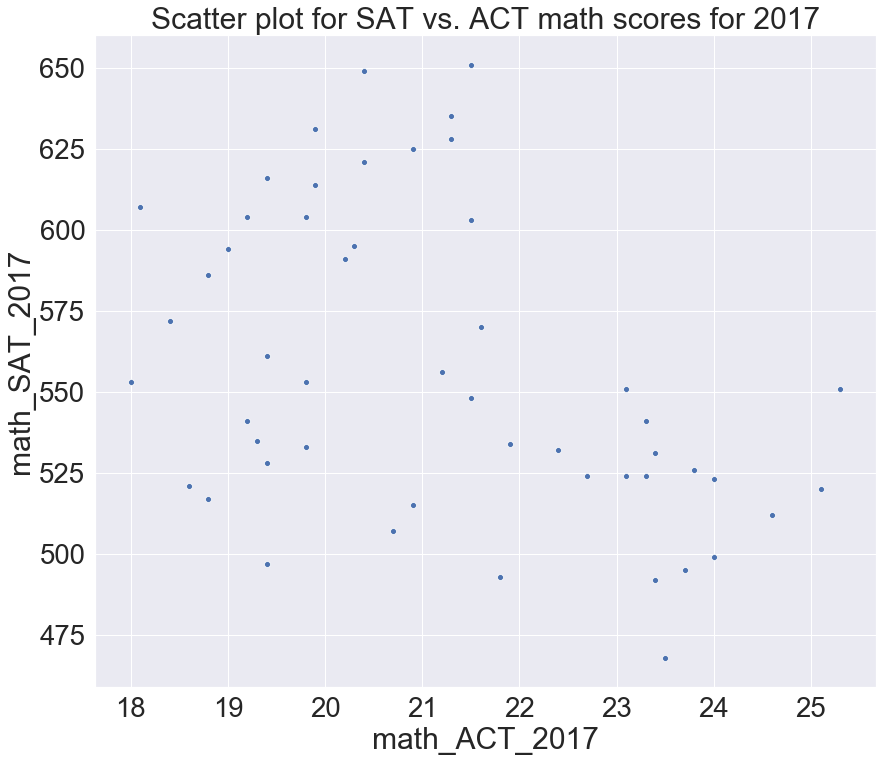

In [26]:
#SAT vs. ACT math scores for 2017
sns.set(rc={'figure.figsize':(14,12)}, font_scale=2.5)
sns.scatterplot(x='math_ACT_2017', y='math_SAT_2017', data=sat_act_2017_2018_merge)
plt.title('Scatter plot for SAT vs. ACT math scores for 2017')  
plt.show()









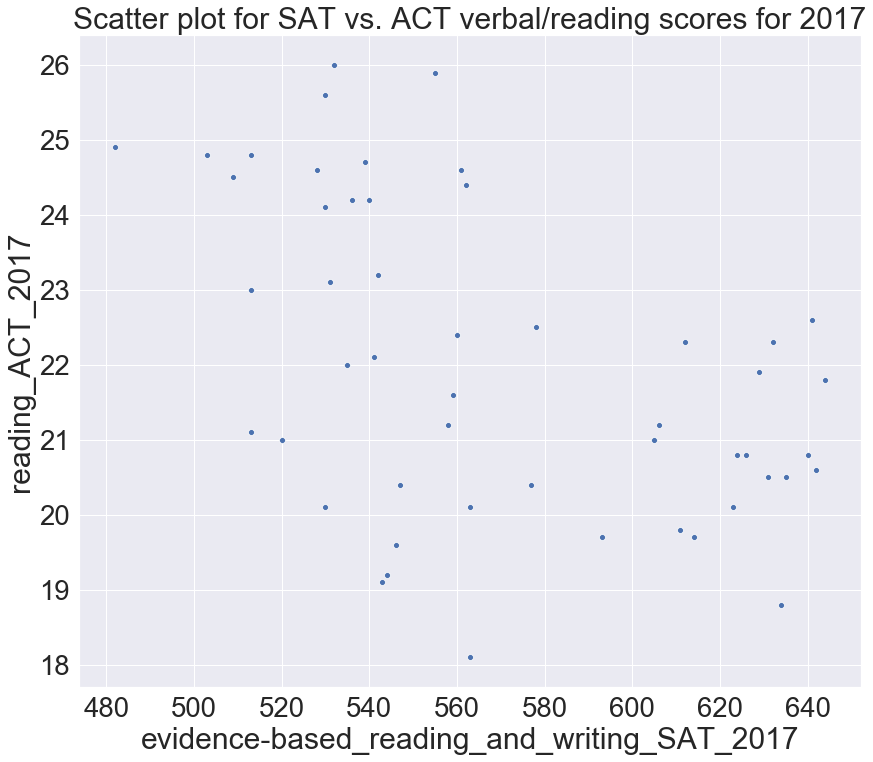

In [27]:
#SAT vs. ACT verbal/reading scores for 2017
sns.scatterplot(x='evidence-based_reading_and_writing_SAT_2017', y='reading_ACT_2017', data=sat_act_2017_2018_merge)
plt.title('Scatter plot for SAT vs. ACT verbal/reading scores for 2017')  
plt.show()

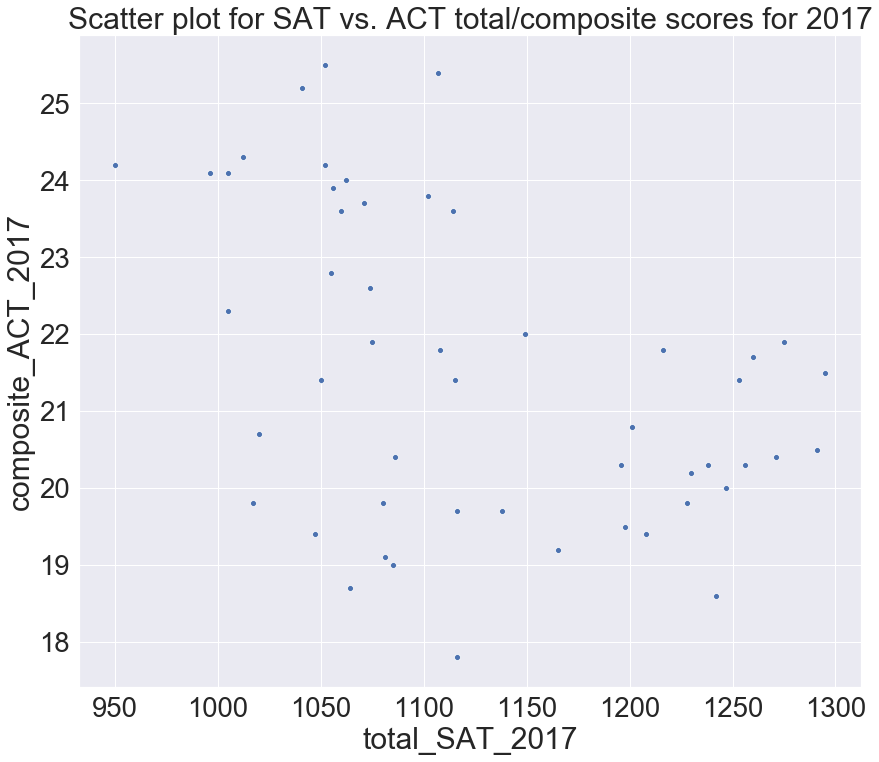

In [28]:
#SAT vs. ACT total/composite scores for 2017
sns.scatterplot(x='total_SAT_2017', y='composite_ACT_2017',data=sat_act_2017_2018_merge)
plt.title('Scatter plot for SAT vs. ACT total/composite scores for 2017')  
plt.show()

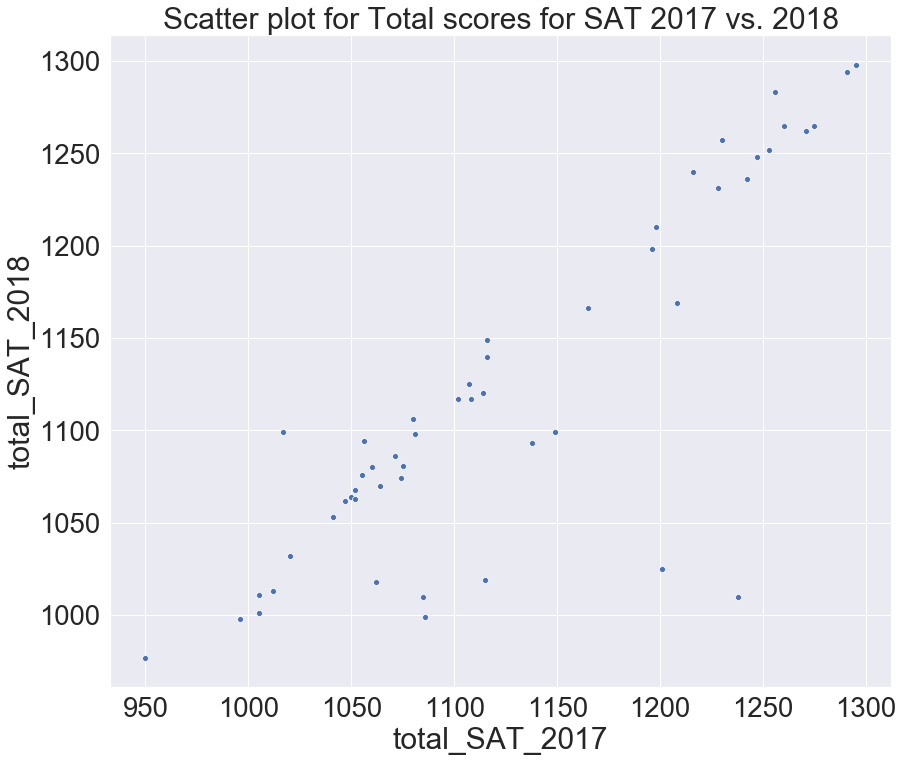

In [29]:
#Total scores for SAT 2017 vs. 2018
sns.scatterplot(x='total_SAT_2017', y='total_SAT_2018',data=sat_act_2017_2018_merge)
plt.title('Scatter plot for Total scores for SAT 2017 vs. 2018')  
plt.show()

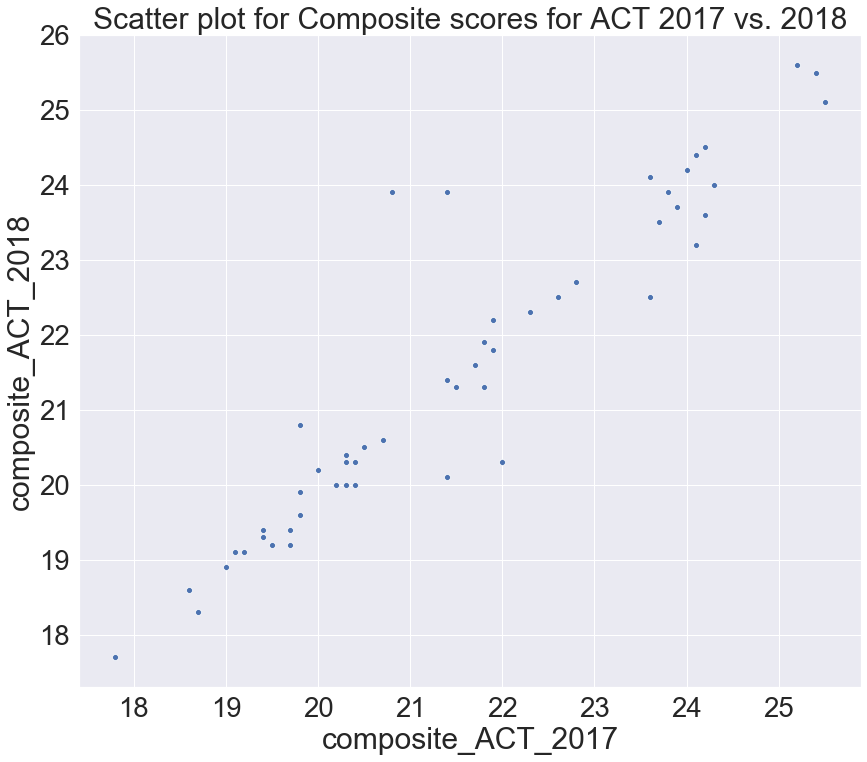

In [30]:
#Composite scores for ACT 2017 vs. 2018
sns.scatterplot(x='composite_ACT_2017', y='composite_ACT_2018',data=sat_act_2017_2018_merge)
plt.title('Scatter plot for Composite scores for ACT 2017 vs. 2018')  
plt.show()

# Findings from scatter plot:
SAT vs. ACT math scores for 2017:two heteroscedastic distribution

SAT vs. ACT verbal/reading scores for 2017:two heteroscedastic distribution

SAT vs. ACT total/composite scores for 2017:two heteroscedastic distribution

Total scores for SAT 2017 vs. 2018: linear relationship with some outliers

Composite scores for ACT 2017 vs. 2018: linear relationship with some outliers



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

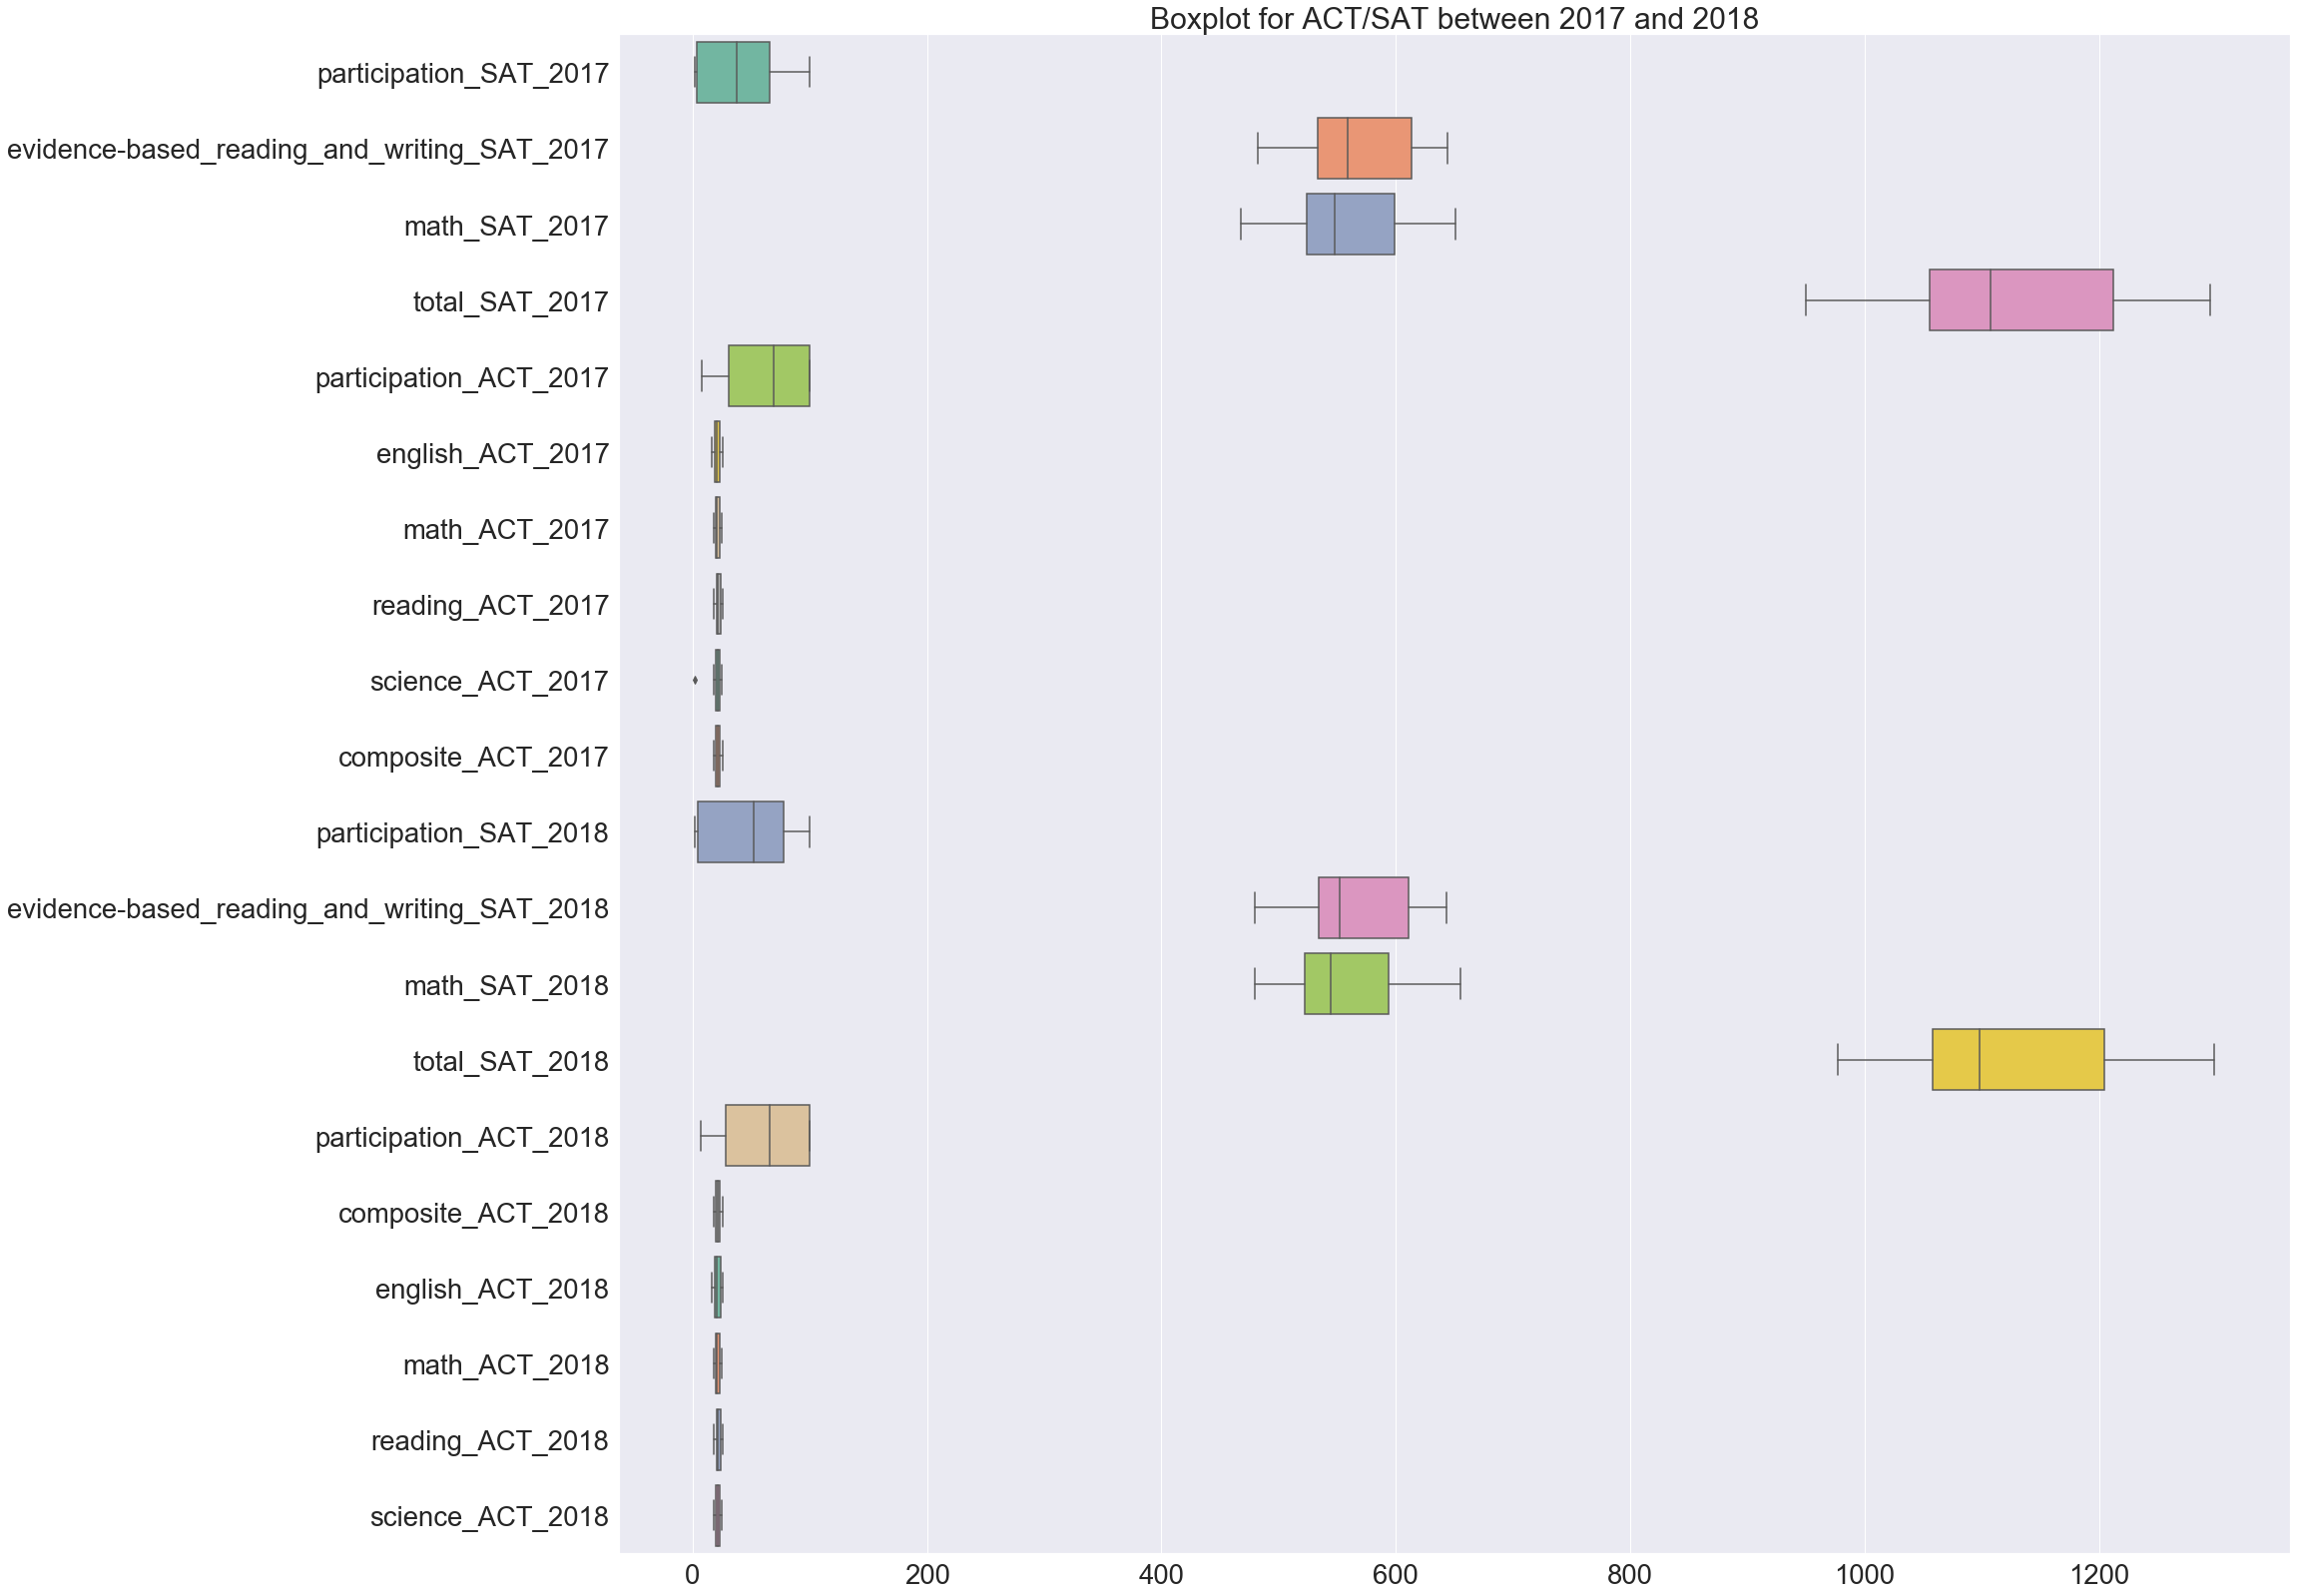

In [31]:
# Code
sns.set(rc={'figure.figsize':(30,28)}, font_scale=2.5)
sns.boxplot(data=sat_act_2017_2018_merge, orient="h", palette="Set2")
plt.title('Boxplot for ACT/SAT between 2017 and 2018')  
plt.show()



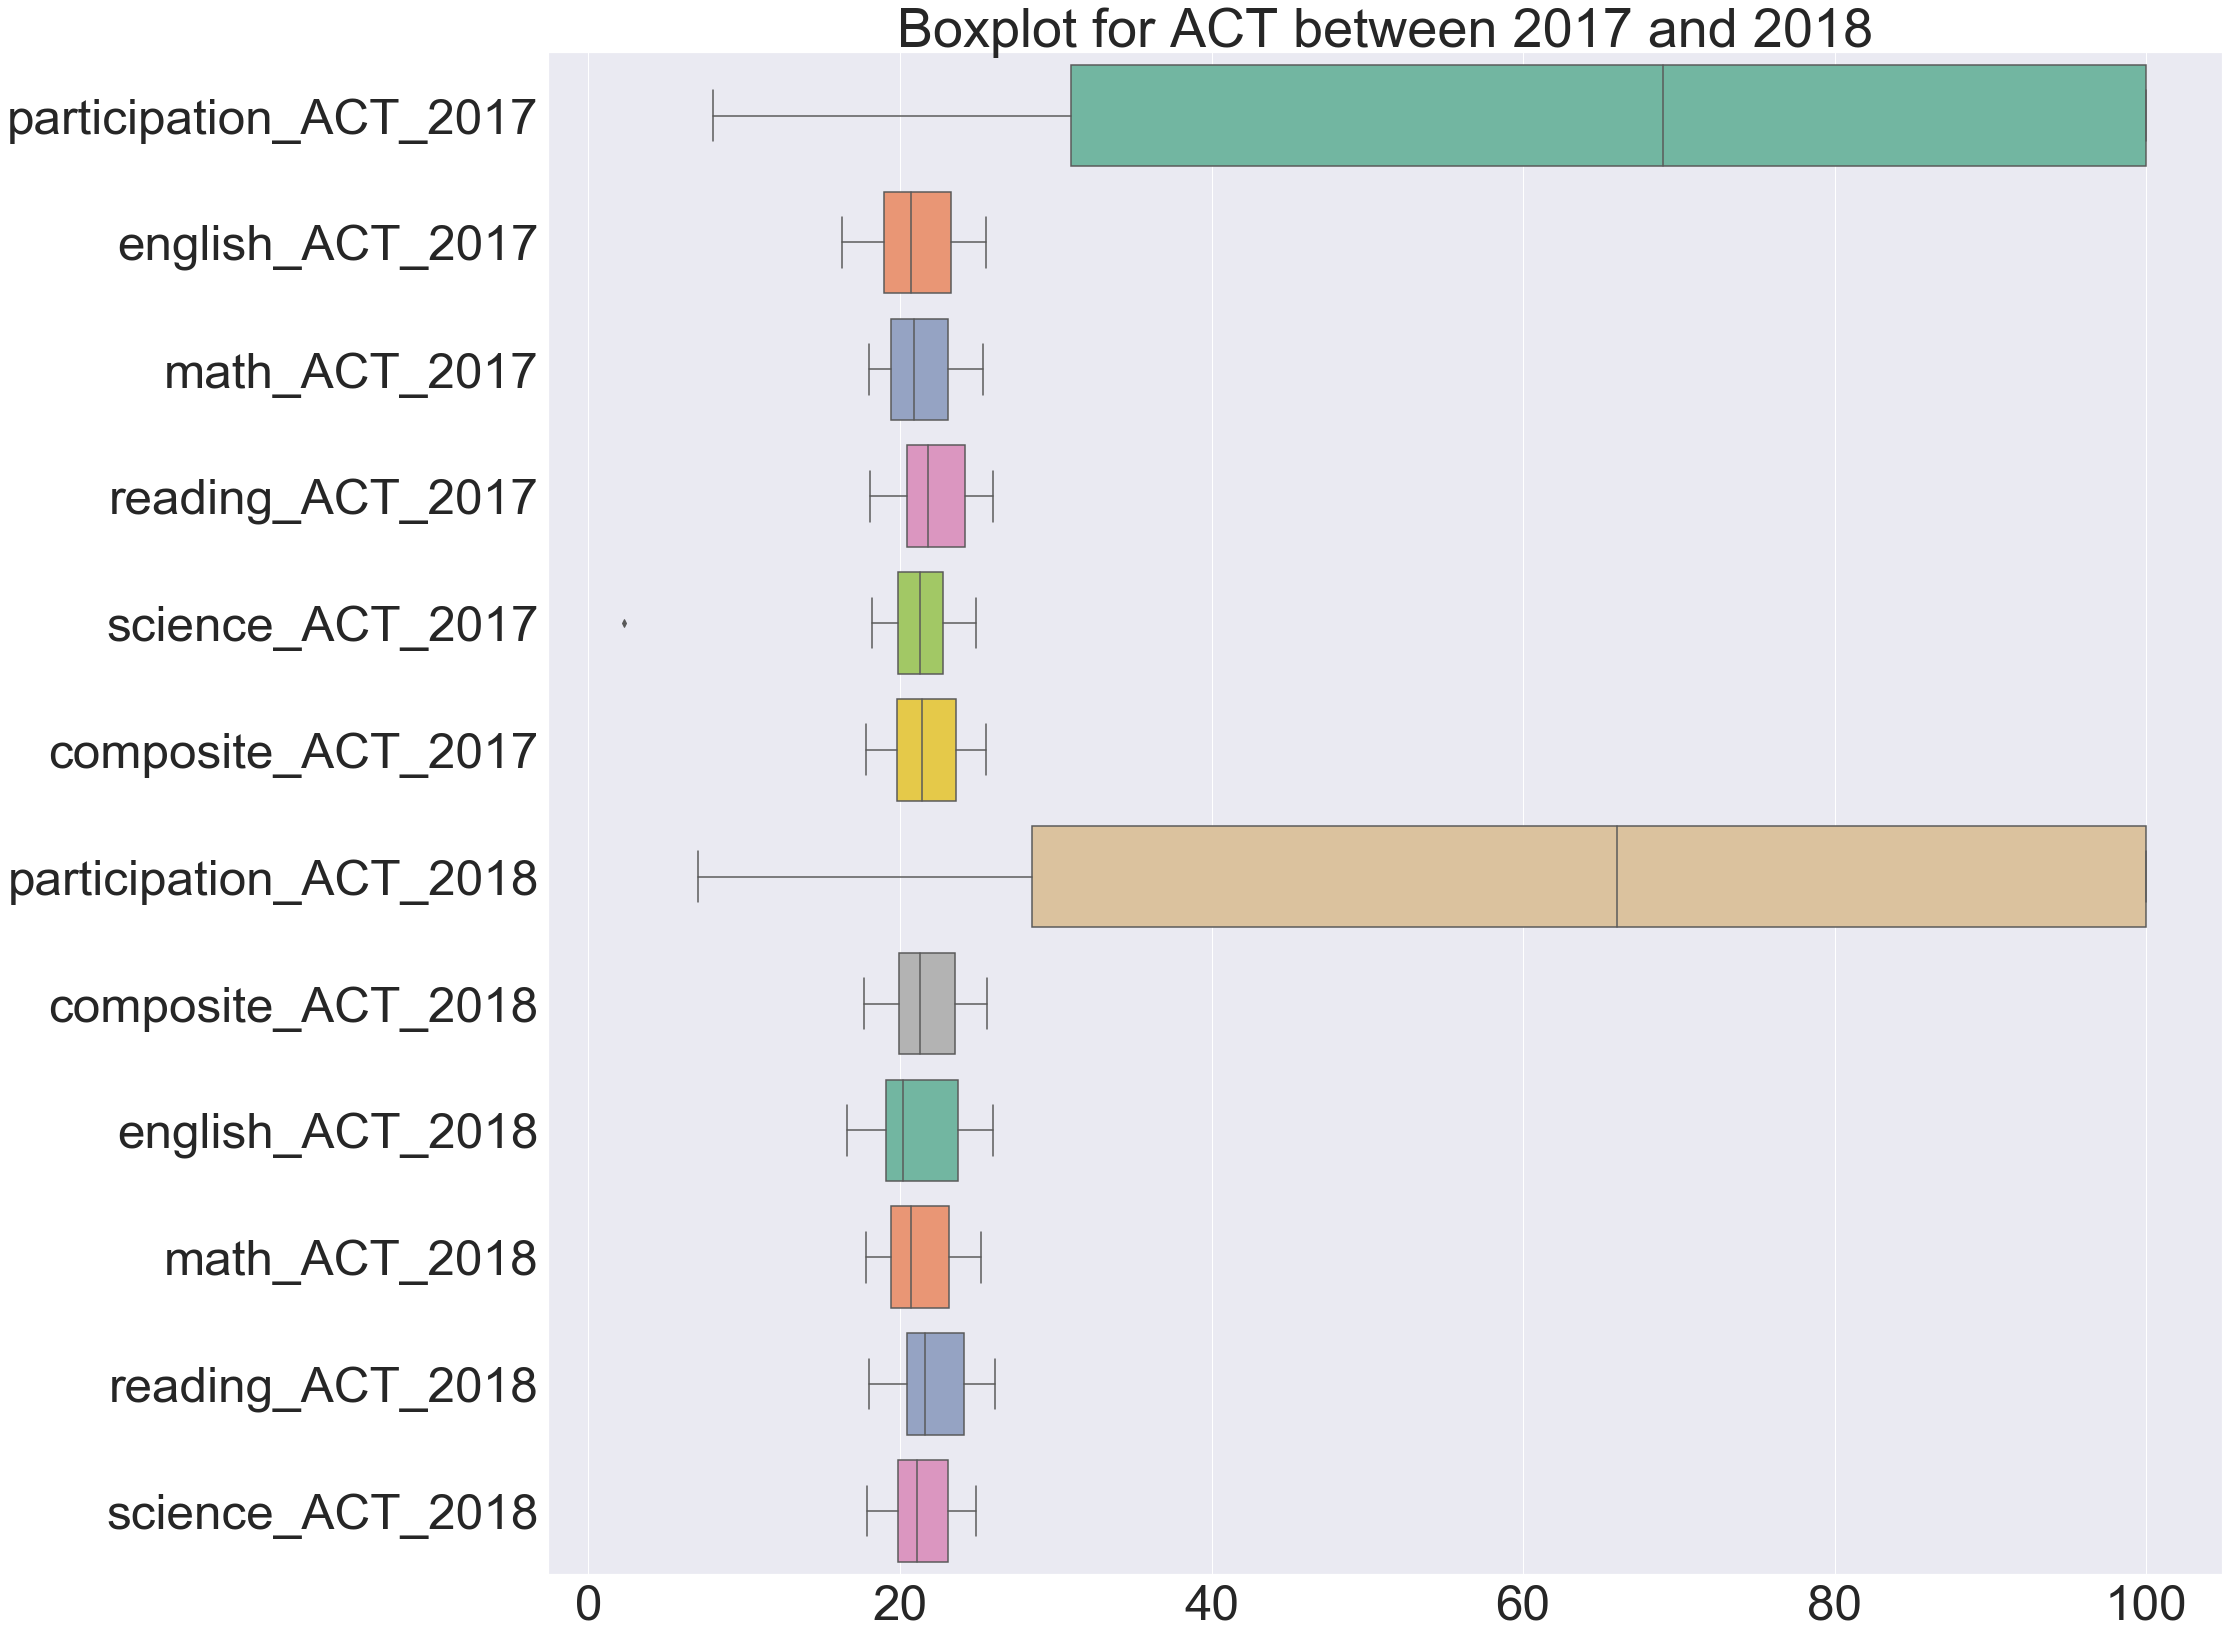

In [32]:
# Code
# Boxplot for ACT between 2017 and 2018
sns.set(rc={'figure.figsize':(30,28)}, font_scale=4.5)
sns.boxplot(data=sat_act_2017_2018_merge.filter(like='_ACT'), orient="h", palette="Set2")
plt.title('Boxplot for ACT between 2017 and 2018')  
plt.show()

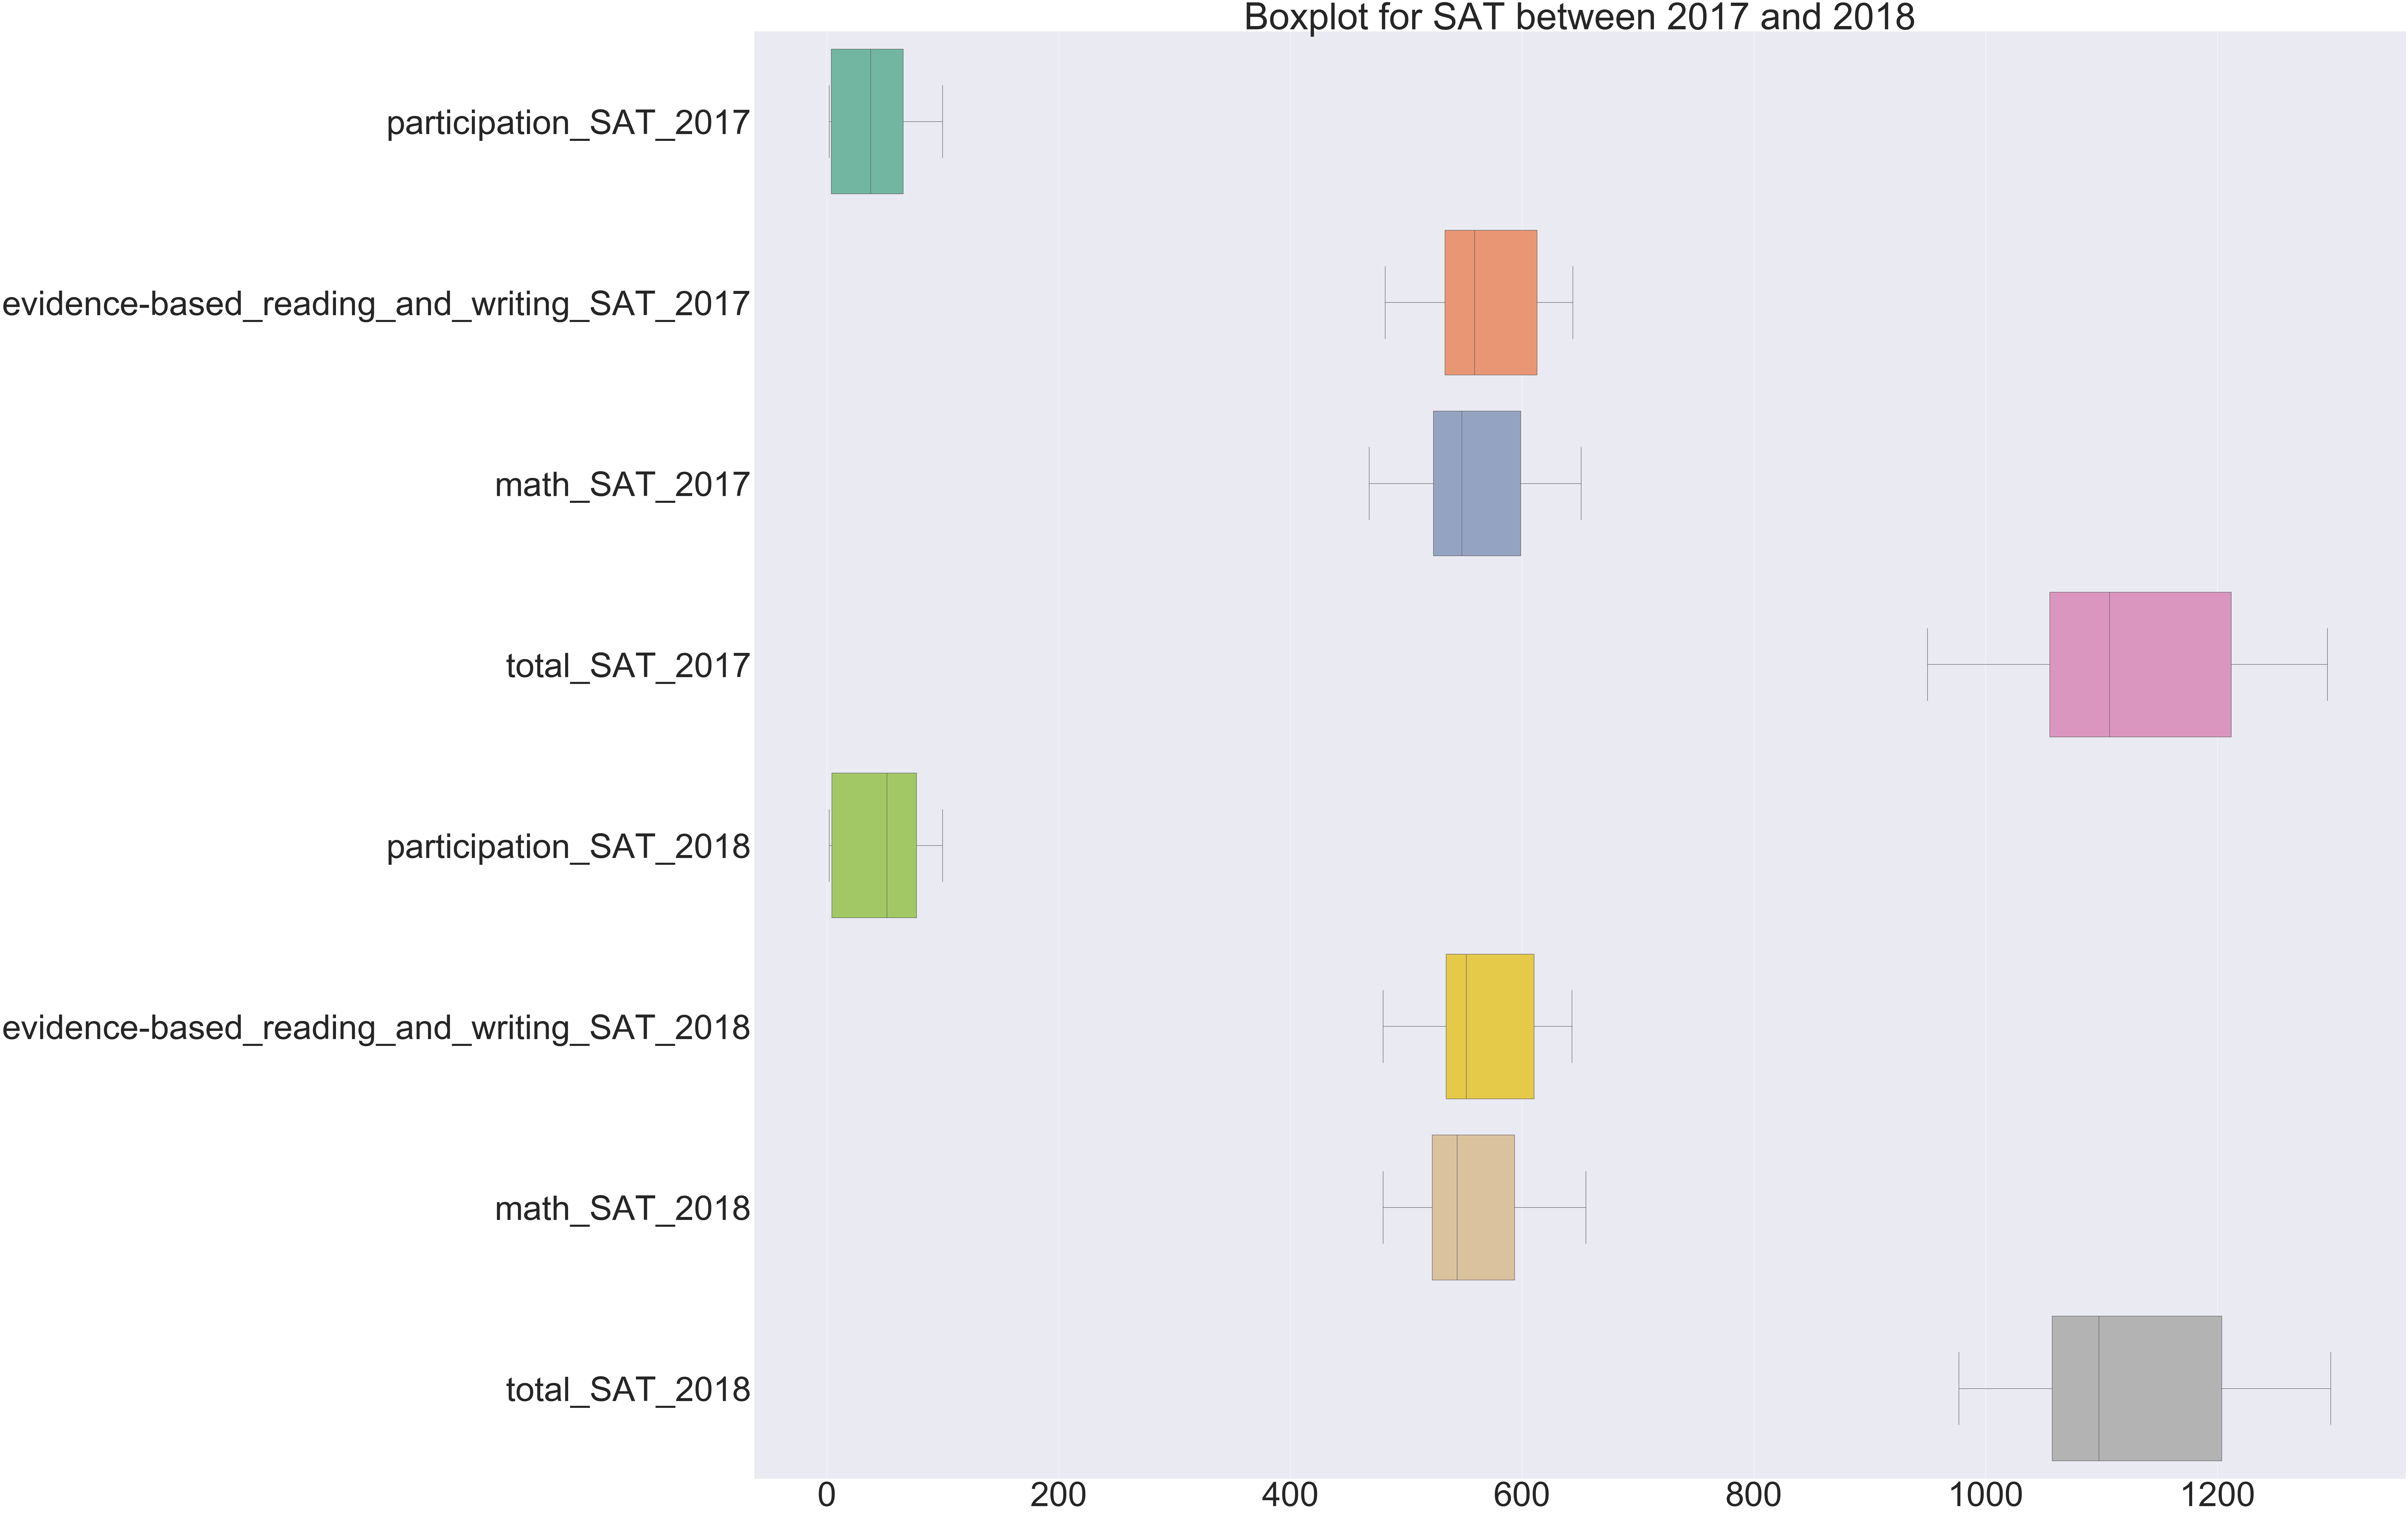

In [33]:
# Code
# Boxplot for SAT between 2017 and 2018
sns.set(rc={'figure.figsize':(100,90)}, font_scale=10.5)
sns.boxplot(data=sat_act_2017_2018_merge.filter(like='_SAT'), orient="h", palette="Set2")
plt.title('Boxplot for SAT between 2017 and 2018')  
plt.show()

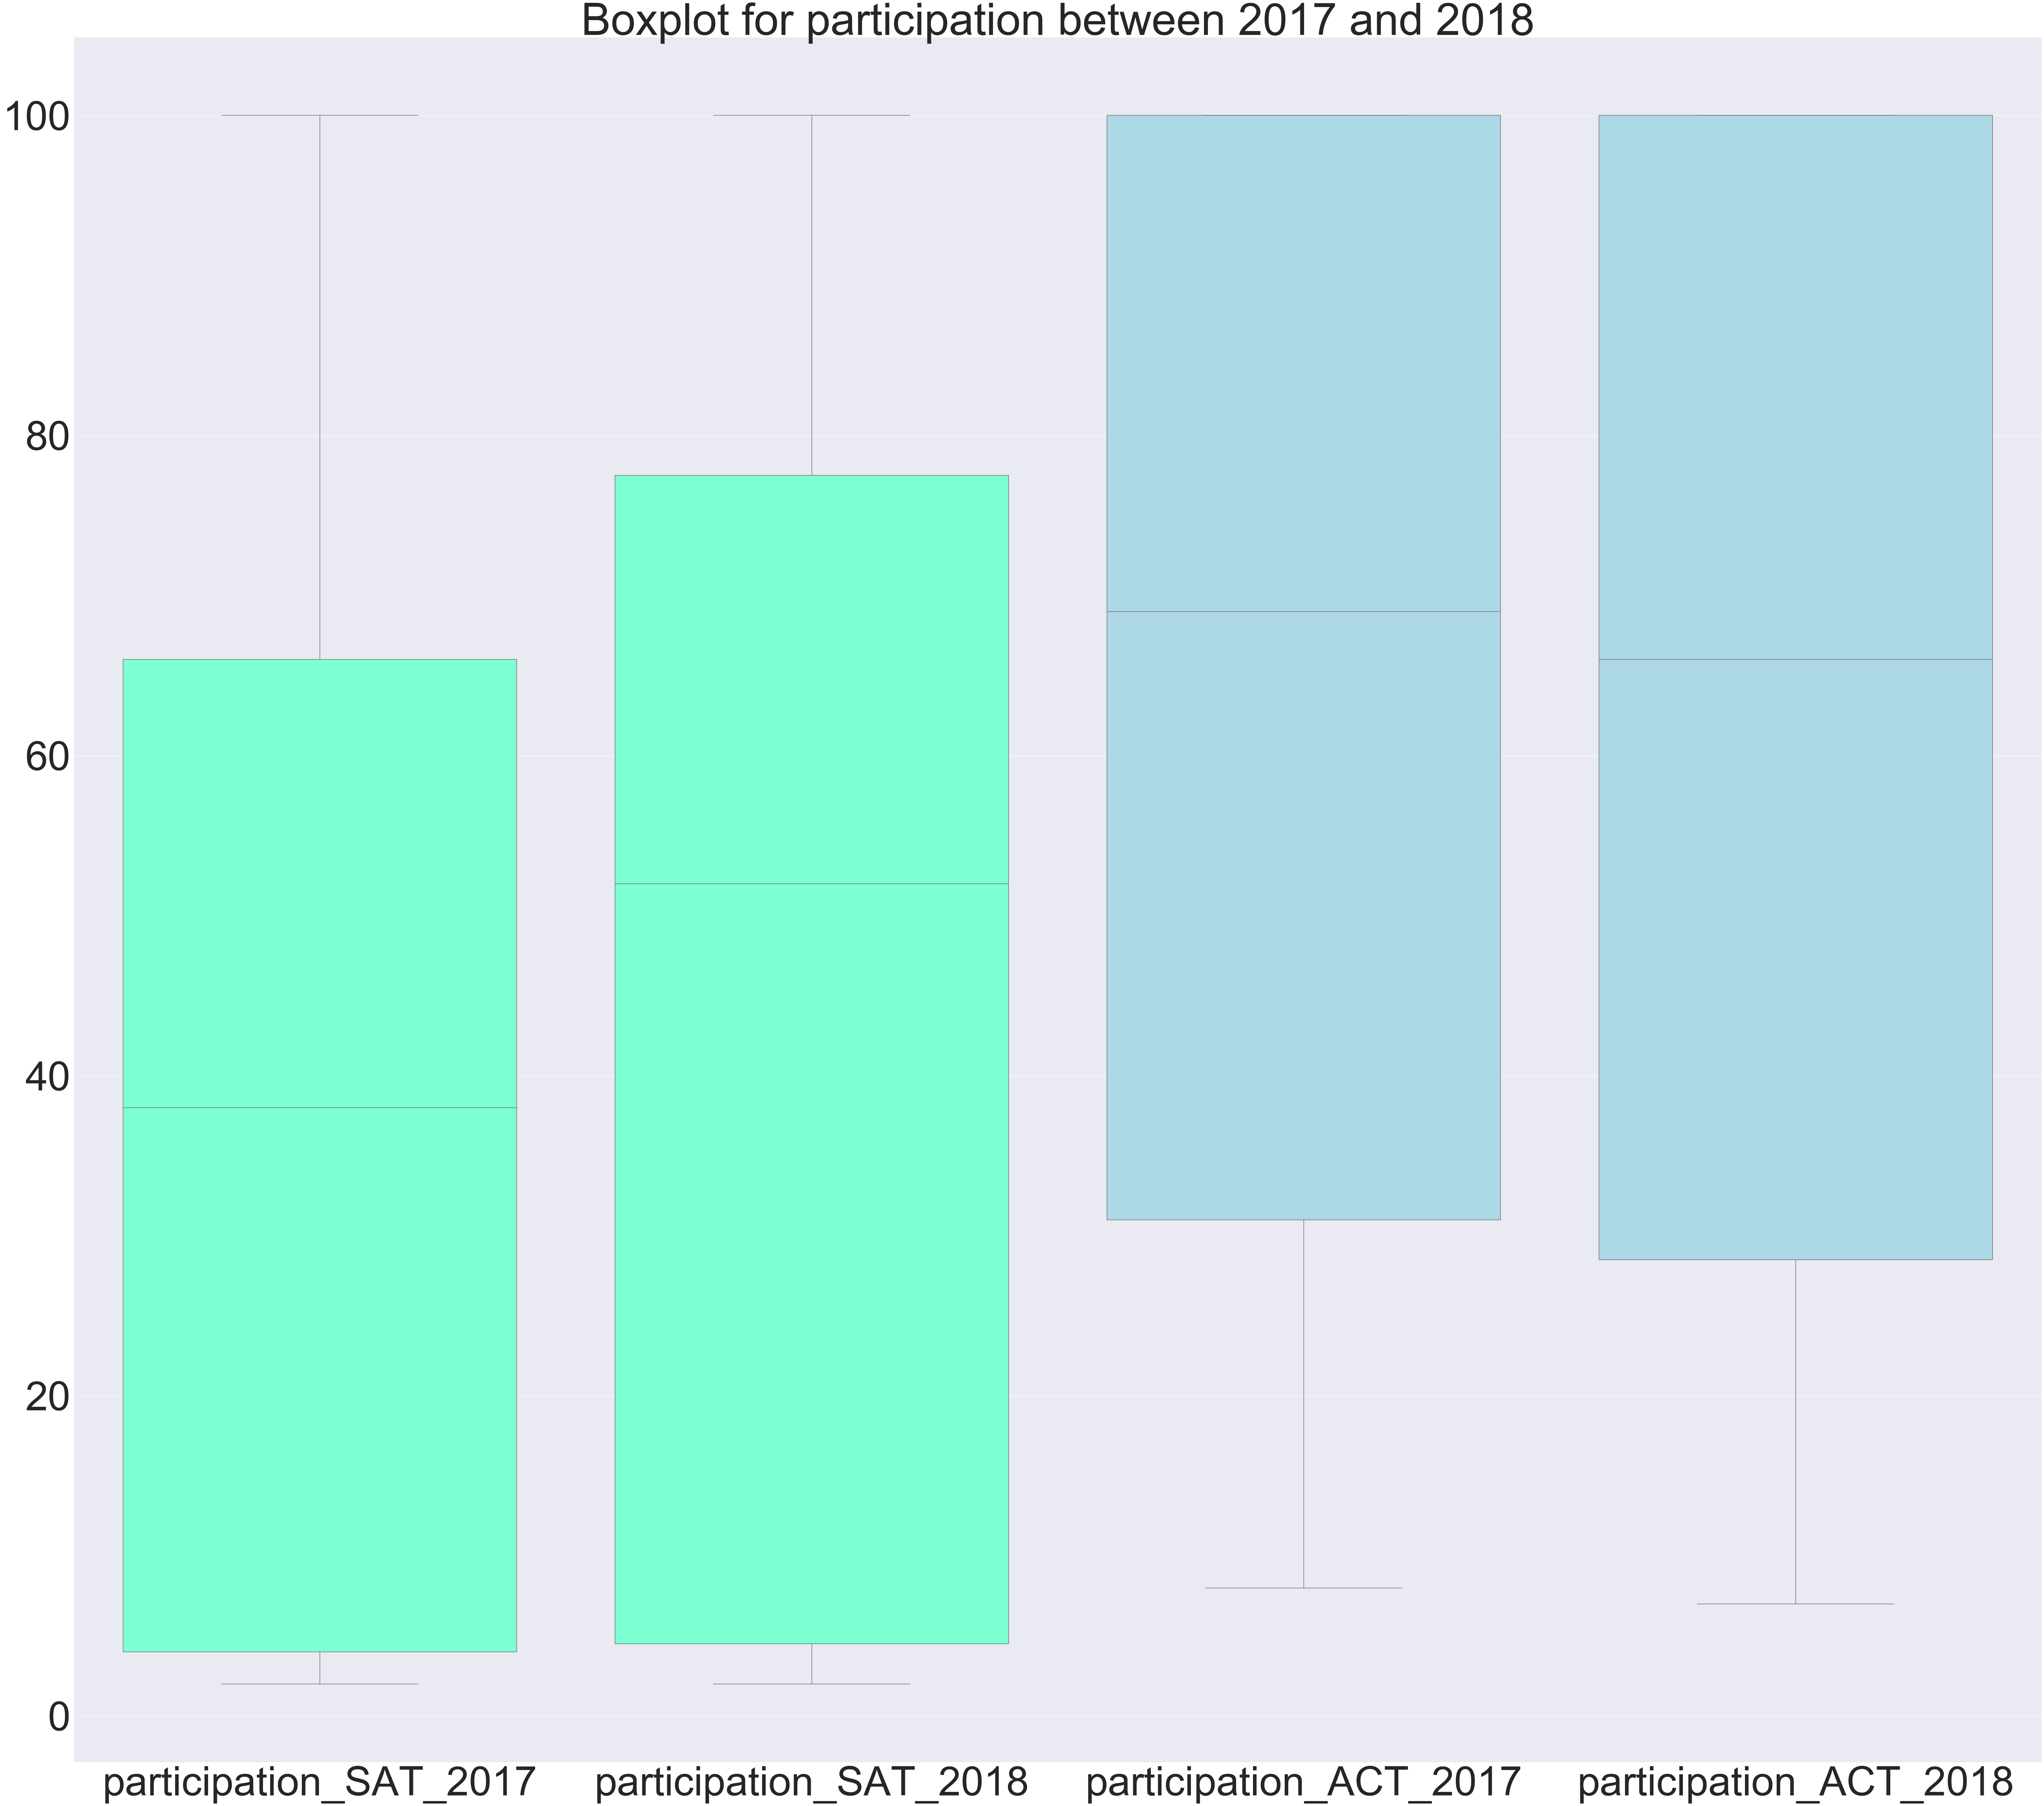

In [34]:
sns.set(rc={'figure.figsize':(100,90)}, font_scale=10.5)
ax=sns.boxplot(data=sat_act_2017_2018_merge[['participation_SAT_2017','participation_SAT_2018','participation_ACT_2017','participation_ACT_2018']], orient="v", palette="Set3")
mybox = ax.artists[0]
mybox1 = ax.artists[1]
mybox2 = ax.artists[2]
mybox3 = ax.artists[3]
# Change the appearance of that box
mybox.set_facecolor('aquamarine')
mybox1.set_facecolor('aquamarine')
mybox2.set_facecolor('lightblue')
mybox3.set_facecolor('lightblue')
plt.title('Boxplot for participation between 2017 and 2018')  
plt.show()

# Visualization of statistical summary using boxplot


The participation rate for SAT is lower than that for ACT. But there is an increase in the median from 2017 and 2018.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

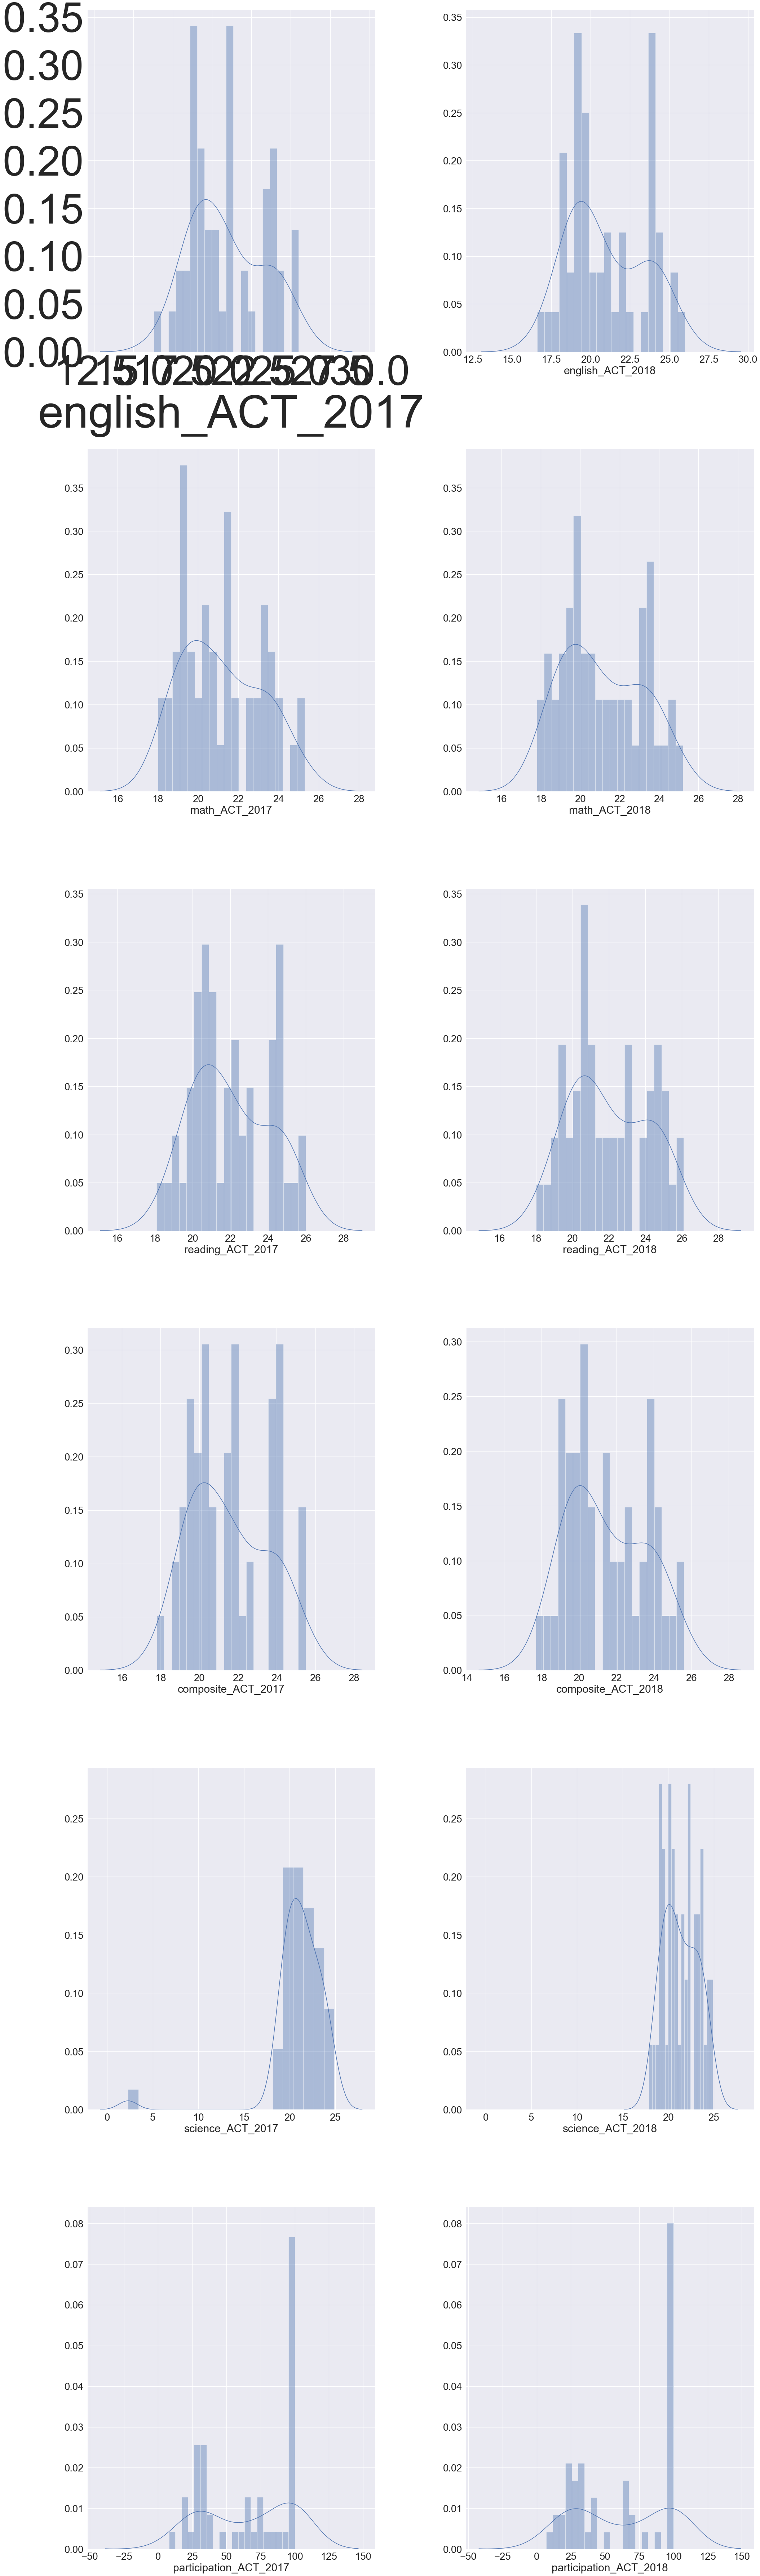

In [35]:
#create distplot for all the numeric columns


def distplot_SAT():
    f = plt.figure(figsize=(30, 80))
    nrows = 4
    gs = f.add_gridspec(nrows, 2)

    with sns.axes_style("darkgrid"):
        ax = f.add_subplot(gs[0, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['math_SAT_2017'], kde=True, color="b", ax=ax, bins=20)

    with sns.axes_style("darkgrid"):
        ax1 = f.add_subplot(gs[0, 1],sharey=ax)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['math_SAT_2018'], kde=True, color="b", ax=ax1,bins=20)

    with sns.axes_style("darkgrid"):
        ax2 = f.add_subplot(gs[1, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['evidence-based_reading_and_writing_SAT_2017'], kde=True, color="b", ax=ax2, bins=20)

    with sns.axes_style("darkgrid"):
        ax3 = f.add_subplot(gs[1, 1])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['evidence-based_reading_and_writing_SAT_2018'], kde=True, color="b", ax=ax3, bins=20)

    with sns.axes_style("darkgrid"):
        ax4 = f.add_subplot(gs[2, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['total_SAT_2017'], kde=True, color="b", ax=ax4, bins=20)

    with sns.axes_style("darkgrid"):
        ax5 = f.add_subplot(gs[2, 1],sharey=ax4)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['total_SAT_2018'], kde=True, color="b", ax=ax5, bins=20)

    with sns.axes_style("darkgrid"):
        ax6 = f.add_subplot(gs[3, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['participation_SAT_2017'], kde=True, color="b", ax=ax6, bins=20)

    with sns.axes_style("darkgrid"):
        ax7 = f.add_subplot(gs[3, 1])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['participation_SAT_2018'], kde=True, color="b", ax=ax7, bins=20)
    
    f.tight_layout()
    
def distplot_ACT():
    f = plt.figure(figsize=(30, 100))
    nrows = 6
    gs = f.add_gridspec(nrows, 2)

    with sns.axes_style("darkgrid"):
        ax = f.add_subplot(gs[0, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['english_ACT_2017'], kde=True, color="b", ax=ax, bins=20)

    with sns.axes_style("darkgrid"):
        ax1 = f.add_subplot(gs[0, 1],sharex=ax,sharey=ax)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['english_ACT_2018'], kde=True, color="b", ax=ax1, bins=20)

    with sns.axes_style("darkgrid"):
        ax2 = f.add_subplot(gs[1, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['math_ACT_2017'], kde=True, color="b", ax=ax2, bins=20)

    with sns.axes_style("darkgrid"):
        ax3 = f.add_subplot(gs[1, 1],sharey=ax2)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['math_ACT_2018'], kde=True, color="b", ax=ax3, bins=20)

    with sns.axes_style("darkgrid"):
        ax4 = f.add_subplot(gs[2, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['reading_ACT_2017'], kde=True, color="b", ax=ax4, bins=20)

    with sns.axes_style("darkgrid"):
        ax5 = f.add_subplot(gs[2, 1],sharey=ax4)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['reading_ACT_2018'], kde=True, color="b", ax=ax5, bins=20)

    with sns.axes_style("darkgrid"):
        ax6 = f.add_subplot(gs[3, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['composite_ACT_2017'], kde=True, color="b", ax=ax6, bins=20)

    with sns.axes_style("darkgrid"):
        ax7 = f.add_subplot(gs[3, 1])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['composite_ACT_2018'], kde=True, color="b", ax=ax7, bins=20)
    
    with sns.axes_style("darkgrid"):
        ax8 = f.add_subplot(gs[4, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['science_ACT_2017'], kde=True, color="b", ax=ax8, bins=20)

    with sns.axes_style("darkgrid"):
        ax9 = f.add_subplot(gs[4, 1],sharex=ax8,sharey=ax8)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['science_ACT_2018'], kde=True, color="b", ax=ax9, bins=20)


    with sns.axes_style("darkgrid"):
        ax10 = f.add_subplot(gs[5, 0])
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['participation_ACT_2017'], kde=True, color="b", ax=ax10, bins=20)

    with sns.axes_style("darkgrid"):
        ax11 = f.add_subplot(gs[5, 1],sharex=ax10,sharey=ax10)
        sns.set(font_scale=2.5)
        sns.distplot(sat_act_2017_2018_merge['participation_ACT_2018'], kde=True, color="b", ax=ax11, bins=20)

    f.tight_layout()
    
distplot_ACT()



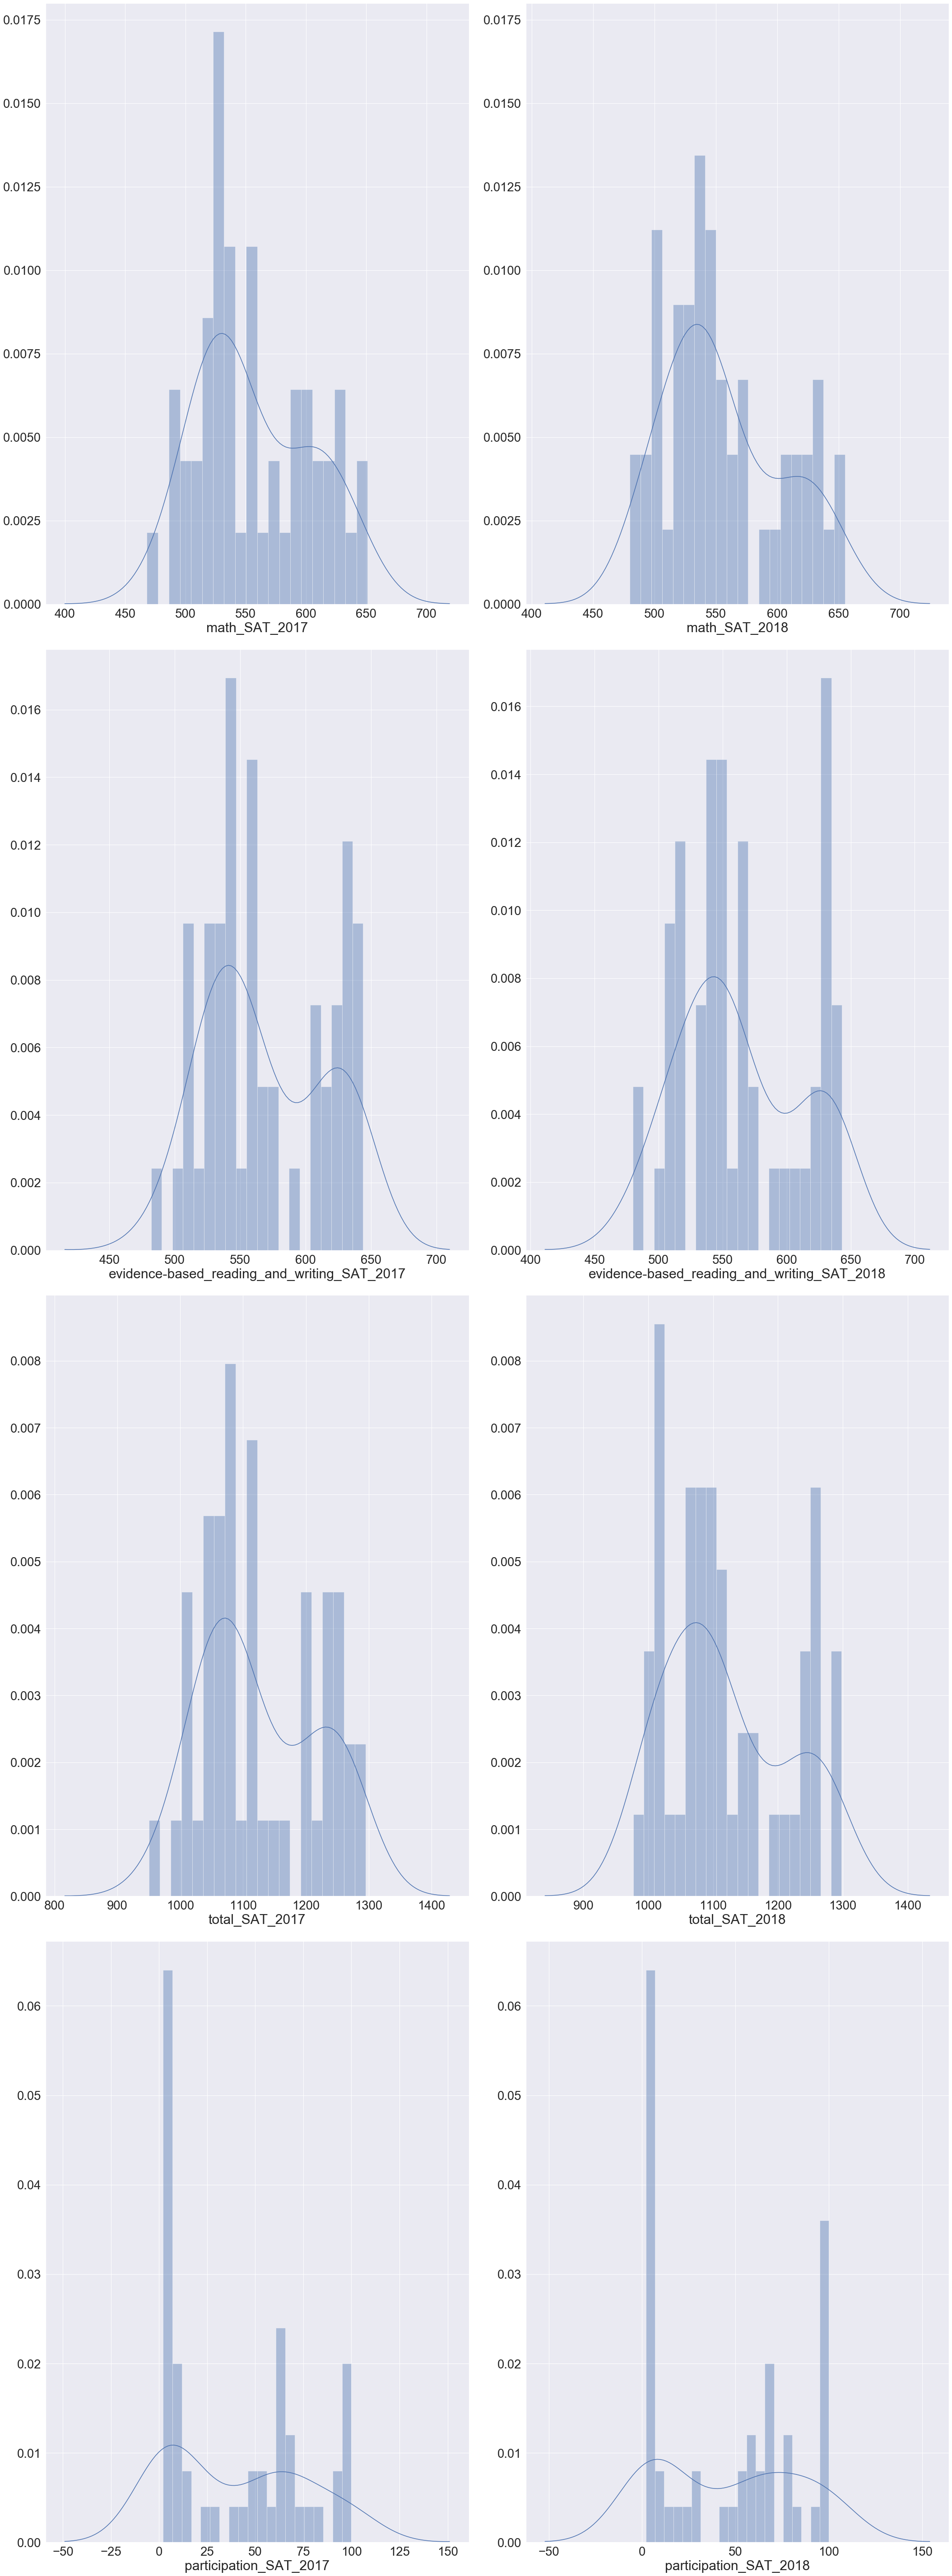

In [36]:
distplot_SAT()

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

participation_SAT_2017:
 The distribution has a mean of 39.8, median of 38.0, first quartile(Q1) value of 4.0 and third quartile(Q3) value of 66.0.
 The distribution has an interquartile range(Q3-Q1) of 62.0, and standard deviation of 35.3.
 It is skewed to the left.
 
evidence-based_reading_and_writing_SAT_2017:
 The distribution has a mean of 569.1, median of 559.0, first quartile(Q1) value of 533.5 and third quartile(Q3) value of 613.0.
 The distribution has an interquartile range(Q3-Q1) of 79.5, and standard deviation of 45.7.
 It is skewed to the left.

math_SAT_2017:
 The distribution has a mean of 556.9, median of 548.0, first quartile(Q1) value of 523.5 and third quartile(Q3) value of 599.0.
 The distribution has an interquartile range(Q3-Q1) of 51.0, and standard deviation of 47.1.
 It is skewed to the left.

total_SAT_2017:
 The distribution has a mean of 1126.1, median of 1107.0, first quartile(Q1) value of 1055.5 and third quartile(Q3) value of 1212.0.
 The distribution has an interquartile range(Q3-Q1) of 156.5, and standard deviation of 92.5.
 It is skewed to the left.

participation_ACT_2017: 
 The distribution has a mean of 65.3, median of 69.0, first quartile(Q1) value of 31.0 and third quartile(Q3) value of 100.0.
 The distribution has an interquartile range(Q3-Q1) of 69.0, and standard deviation of 32.1.
 It is not a normal distribution.

english_ACT_2017:
 The distribution has a mean of 20.9, median of 20.7, first quartile(Q1) value of 19.0 and third quartile(Q3) value of 23.3.
 The distribution has an interquartile range(Q3-Q1) of 4.3, and standard deviation of 2.4.
 It is skewed to the left.

math_ACT_2017:
 The distribution has a mean of 21.2, median of 20.9, first quartile(Q1) value of 19.4 and third quartile(Q3) value of 23.1.
 The distribution has an interquartile range(Q3-Q1) of 3.7, and standard deviation of 2.0.
 It is skewed to the left.

reading_ACT_2017: 
 The distribution has a mean of 22.0, median of 21.8, first quartile(Q1) value of 20.5 and third quartile(Q3) value of 24.2.
 The distribution has an interquartile range(Q3-Q1) of 3.7, and  standard deviation of 2.1.
 It is skewed to the left.
 
science_ACT_2017:
 The distribution has a mean of 21.0, median of 21.3, first quartile(Q1) value of 19.9 and third quartile(Q3) value of 22.8.
 The distribution has an interquartile range(Q3-Q1) of 2.9, and standard deviation of 3.2.
 It is skewed to the right.

composite_ACT_2017:
 The distribution has a mean of 21.5, median of 21.4, first quartile(Q1) value of 19.8 and third quartile(Q3) value of 23.6.
 The distribution has an interquartile range(Q3-Q1) of 3.8, and standard deviation of 2.0.
 It is skewed to the left.
 
participation_SAT_2018:
 The distribution has a mean of 45.7, median of 52.0, first quartile(Q1) value of 4.5 and third quartile(Q3) value of 77.5.
The distribution has an interquartile range(Q3-Q1) of 73.0, and standard deviation of 37.3.
 It is skewed to the left.

evidence-based_reading_and_writing_SAT_2018:
 The distribution has a mean of 563.7, median of 552.0, first quartile(Q1) value of 534.5 and third quartile(Q3) value of 610.5.
 The distribution has an interquartile range(Q3-Q1) of 76.0, and standard deviation of 47.5.
 It is skewed to the left.
 
math_SAT_2018: 
 The distribution has a mean of 556.2, median of 544.0, first quartile(Q1) value of 522.5 and third quartile(Q3) value of 593.5.
 The distribution has an interquartile range(Q3-Q1) of 71.0, and standard deviation of 47.8.
 It is skewed to the left.

total_SAT_2018: 
 The distribution has a mean of 1120.0, median of 1098.0, first quartile(Q1) value of 1057.5 and third quartile(Q3) value of 1204.0.
 The distribution has an interquartile range(Q3-Q1) of 146.5, and standard deviation of 94.2.
 It is skewed to the left. 
 
participation_ACT_2018: 
 The distribution has a mean of 61.6, median of 66.0, first quartile(Q1) value of 28.5 and third quartile(Q3) value of 100.0.
 The distribution has an interquartile range(Q3-Q1) of 71.5, and standard deviation of 34.1.
 It is not a normal distribution. 
 
composite_ACT_2018: 
 The distribution has a mean of 21.5, median of 21.3, first quartile(Q1) value of 20.0 and third quartile(Q3) value of 23.6.
 The distribution has an interquartile range(Q3-Q1) of 3.6, and standard deviation of 2.1.
 It is skewed to the left. 

english_ACT_2018: 
 The distribution has a mean of 21.0, median of 20.2, first quartile(Q1) value of 19.1 and third quartile(Q3) value of 23.7.
 The distribution has an interquartile range(Q3-Q1) of 4.6, and standard deviation of 2.4.
 It is skewed to the left. 
 
math_ACT_2018: 
 The distribution has a mean of 21.1, median of 20.7, first quartile(Q1) value of 19.4 and third quartile(Q3) value of 23.2.
 The distribution has an interquartile range(Q3-Q1) of 3.8, and standard deviation of 2.0.
 It is skewed to the left. 
 
reading_ACT_2018: 
 The distribution has a mean of 22.0, median of 21.6, first quartile(Q1) value of 20.5 and third quartile(Q3) value of 24.1.
 The distribution has an interquartile range(Q3-Q1) of 3.6, and standard deviation of 2.2.
 It is skewed to the left. 

science_ACT_2018: 
 The distribution has a mean of 21.3, median of 21.1, first quartile(Q1) value of 19.9 and third quartile(Q3) value of 23.1.
 The distribution has an interquartile range(Q3-Q1) of 3.2, and standard deviation of 1.9.
 It is skewed to the left. 
 
The standard deviation for the subtests for ACT were small compared to those for SAT namely is likely due to how the scoring is scaled. The greater the variation in population, we would have to factor in a large confidence interval


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: No. The trend observed between 2017 and 2018 does not resemble a normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer: 
Math : No. The assumption does not hold true <br>
Reading: No. The assumption does not hold true <br>
Rates: No. The assumption does not hold true <br>

The trend observed as such may have arisen because the sample size $n$ collected may not have been large enough. The caveat of which the CLT will hold true is that as $n \rightarrow \infty$, the sampling distribution of $\bar{X}$ will approach a Normal distribution with mean $\mu$ and standard deviation $\frac{\sigma}{\sqrt{n}}$. 
We will have less certainty that there is little difference between the true population value and our sample estimates

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

Given these data specifically, we does not make sense to conduct statistical inferenceas there may be an overlap in data whereby there are students who have taken both tests.
Also, the participation rates provided are at the state-level and does not translate to reflecting the true population parameter 



##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:
Given that the data provided are aggregated score, it might not be appropriate to compare the SAT and ACT math scores.
 
In some states, a very small percentage of college-bound seniors take the SAT. Typically, these students have strong academic backgrounds and are applicants to the nation’s most selective colleges and scholarship programs. Therefore, it is expected that the SAT Math score averages reported for these states will be higher than the overall average. In states where a greater proportion of students, with a wide range of academic backgrounds, take the SAT, and where most colleges in the state require the test for admission, the scores are closer to the overall average.

To do comparison, data drilling down to the individual student level might be useful for investigation.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [37]:
# Code:


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

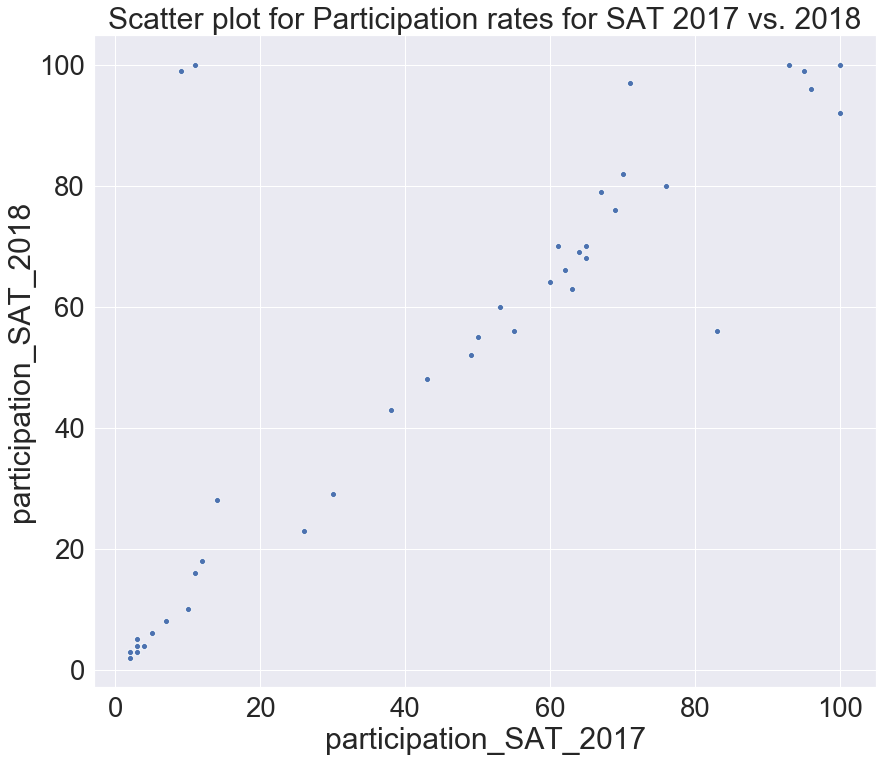

In [38]:
# State of interest 1: Colorado
sns.set(rc={'figure.figsize':(14,12)}, font_scale=2.5)
sns.scatterplot(x='participation_SAT_2017', y='participation_SAT_2018',data=sat_act_2017_2018_merge)
plt.title('Scatter plot for Participation rates for SAT 2017 vs. 2018')  
plt.show()



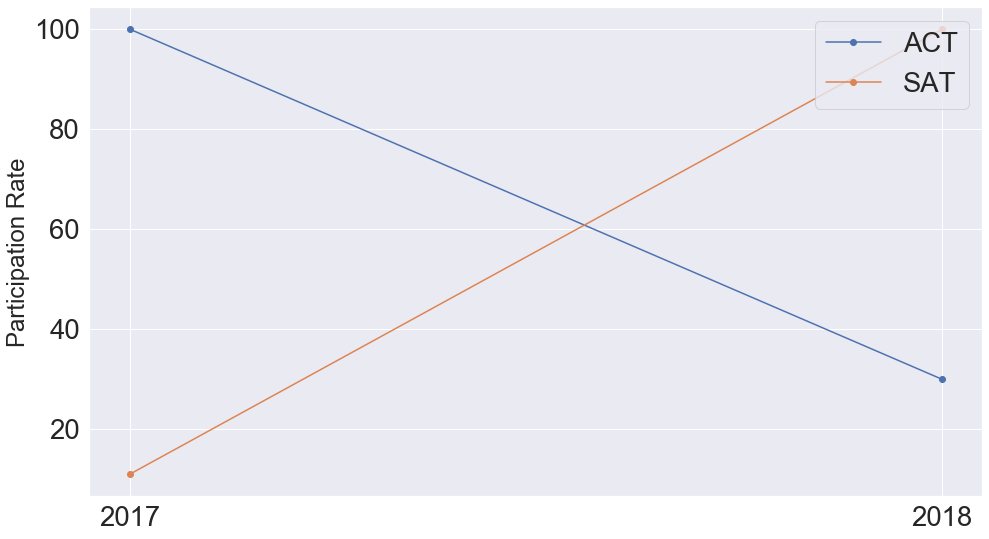

In [39]:

participation_SAT_2017=sat_act_2017_2018_merge.iloc[5]['participation_SAT_2017']
participation_SAT_2018=sat_act_2017_2018_merge.iloc[5]['participation_SAT_2018']
participation_ACT_2017=sat_act_2017_2018_merge.iloc[5]['participation_ACT_2017']
participation_ACT_2018=sat_act_2017_2018_merge.iloc[5]['participation_ACT_2018']
df = pd.DataFrame([{'participation':participation_SAT_2017,'year':'2017','test':'SAT'},{'participation':participation_SAT_2018,'year':'2018','test':'SAT'},{'participation':participation_ACT_2017,'year':'2017','test':'ACT'},{'participation':participation_ACT_2018,'year':'2018','test':'ACT'}]
                  ,index=[0,1,2,3])

plt.figure(figsize=(16, 9))

for i in ['ACT', 'SAT']:
    plt.plot(df[(df['test'] == i) & ((df['year'] == '2017') | (df['year'] == '2018'))]['year'],
         df[(df['test'] == i) & ((df['year'] == '2017') | (df['year'] == '2018'))]['participation'],
          label = i, marker = 'o')

    
plt.legend(loc = 'upper right')
plt.ylabel("Participation Rate", fontsize = 24);

As seen in the scatter plot, there is a positive correlation between participation rates in 2017 and 2018. However, on closer examination on the outliers in the upper left quadrant, it emerged that Colorado is one of the 2 states.

Effective as of Spring 2018, statewide SAT assessment was implemented. This resulted in 100% participation rate, from 11% in 2017. A decline in the ACT assessment from 100% to 30% is observed following the discontinued use of the ACT as the statewide census test.

State of interest 2: Minnesota

Consistently ranking amongst the top-performing states for SAT for 2017 and 2018, it is also amongst the states that had the lowest participation rates for SAT. Alongside several other states in the Midwest, these states tend to have 100% participation rates for the statewide administered ACT. The inverse relationship between participation rate for SAT and total score is likely to have arisen because of highly motivated,ambitious students that take both the SAT and ACT and typically tend to score higher, effectively raising the state's average. It is also noted that the submission of SAT to top universities across the nation and within the MidWestern region itself is more popular(Forbes, 2014)

State of interest 3: Neveda

Neveda has been the lowest performing state for 2017 and 2018. This has been attributed to the fact that Nevada began to mandate statewide ACT testing starting in 2016. The lower scores is due to big jumps in test takers, resulting in lower averages(Prepscholar,2019)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

# Takeaways and Recommendation
A larger sample size will result in better estimations of the true population parameter through statistical inference. State-by-state comparison of average SAT scores is misleading and may not be representive of each state's test-taking performance. As observed, there is an inverse relationship between SAT and ACT participation rates. It is observed that when students do not self select and rather take the test as part of a requirement or as what they view their only option, their scores tend to be lower.

Continued efforts to provide universal testing and securing more state contracts is a way to increase partipation rate amongst graduating seniors.

In a report released by the College Board, it noted the increase in SAT participation due to the continued growth of SAT School Day with almost 960,000 students in the class of 2019 that took part in SAT School Day, up from about 778,000 in the class of 2018. In 2018-19, 10 states (Colorado, Connecticut, Delaware, Idaho, Illinois, Maine, Michigan, New Hampshire, Rhode Island, and West Virginia) and the District of Columbia administered the SAT at no cost to students.

A state that can benefit from a strategic partnership with the College Board is Alabama. The composite mean scores for 2017 and 2018 are below the national mean. The alignment of the revamped SAT with the Common Core adopted by the State could potentially be a better fit for graduating seniors of Alabama. In addition, according to latest data from the US Census Bureau, Alabama was 1 of 9 states that saw wider income gaps. Universal testing is a means to draw talented, disadvantaged students into college and has a modest but clear impact on college attendance, especially at four-year colleges(Dynaski, 2018). A separate research conducted showed a modest but sizeable group of "non-takers" in Virginia would have qualified for colleges U-Va. or William & Mary if they have completed the SAT(Cook and Turner,2019) This was done by exploring state test scores and demographic data to predict what would have happened if non-takers had completed the SAT. Such findings is aligned with College Board's efforts to create a more equitable college-access landscape though initiatives like the SAT School Day.

# Sources
**College Board** "Benefits of SAT School Day" https://reports.collegeboard.org/sat-suite-program-results/benefits-sat-school-day

**Susan Dynarski**.2018. "ACT/SAT for all: A cheap, effective way to narrow income gaps in college" https://www.brookings.edu/research/act-sat-for-all-a-cheap-effective-way-to-narrow-income-gaps-in-college/

**Emily Cook, Sarah Turner**.2019."Missed Exams and Lost Opportunities: Who Could Gain From Expanded College Admission Testing?" https://journals.sagepub.com/doi/full/10.1177/2332858419855030

**Ben Taylor**.2014.Forbes."Why The Midwest Dominates the SAT"https://www.forbes.com/sites/bentaylor/2014/07/17/why-the-midwest-dominates-the-sat/#35f1780c2f37

**Halle Edwards**.2019.PrepScholar."https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows"